In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import date
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ifood_df.csv to ifood_df.csv


In [ ]:
df = pd.read_csv('ifood_df.csv')

#**Data Exploration and Cleaning**

In [ ]:
df.head()

Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  MntMeatProducts  \
0  58138.0        0         0       58       635         88              546   
1  46344.0        1         1       38        11          1                6   
2  71613.0        0         0       26       426         49              127   
3  26646.0        1         0       26        11          4               20   
4  58293.0        1         0       94       173         43              118   

   MntFishProducts  MntSweetProducts  MntGoldProds  ...  marital_Together  \
0              172                88            88  ...                 0   
1                2                 1             6  ...                 0   
2              111                21            42  ...                 1   
3               10                 3             5  ...                 1   
4               46                27            15  ...                 0   

   marital_Widow  education_2n Cycle  education_Basic  education_Graduation  \
0              0                   0                0                     1   
1              0                   0                0                     1   
2              0                   0                0                     1   
3              0                   0                0                     1   
4              0                   0                0                     0   

   education_Master  education_PhD  MntTotal  MntRegularProds  \
0                 0              0      1529             1441   
1                 0              0        21               15   
2                 0              0       734              692   
3                 0              0        48               43   
4                 0              1       407              392   

   AcceptedCmpOverall  
0                   0  
1                   0  
2                   0  
3                   0  
4                   0  

[5 rows x 39 columns]

In [ ]:
df.describe()

Income      Kidhome     Teenhome      Recency     MntWines  \
count    2205.000000  2205.000000  2205.000000  2205.000000  2205.000000   
mean    51622.094785     0.442177     0.506576    49.009070   306.164626   
std     20713.063826     0.537132     0.544380    28.932111   337.493839   
min      1730.000000     0.000000     0.000000     0.000000     0.000000   
25%     35196.000000     0.000000     0.000000    24.000000    24.000000   
50%     51287.000000     0.000000     0.000000    49.000000   178.000000   
75%     68281.000000     1.000000     1.000000    74.000000   507.000000   
max    113734.000000     2.000000     2.000000    99.000000  1493.000000   

         MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  \
count  2205.000000      2205.000000      2205.000000       2205.000000   
mean     26.403175       165.312018        37.756463         27.128345   
std      39.784484       217.784507        54.824635         41.130468   
min       0.000000         0.000000         0.000000          0.000000   
25%       2.000000        16.000000         3.000000          1.000000   
50%       8.000000        68.000000        12.000000          8.000000   
75%      33.000000       232.000000        50.000000         34.000000   
max     199.000000      1725.000000       259.000000        262.000000   

       MntGoldProds  ...  marital_Together  marital_Widow  education_2n Cycle  \
count   2205.000000  ...       2205.000000    2205.000000         2205.000000   
mean      44.057143  ...          0.257596       0.034467            0.089796   
std       51.736211  ...          0.437410       0.182467            0.285954   
min        0.000000  ...          0.000000       0.000000            0.000000   
25%        9.000000  ...          0.000000       0.000000            0.000000   
50%       25.000000  ...          0.000000       0.000000            0.000000   
75%       56.000000  ...          1.000000       0.000000            0.000000   
max      321.000000  ...          1.000000       1.000000            1.000000   

       education_Basic  education_Graduation  education_Master  education_PhD  \
count      2205.000000           2205.000000       2205.000000    2205.000000   
mean          0.024490              0.504762          0.165079       0.215873   
std           0.154599              0.500091          0.371336       0.411520   
min           0.000000              0.000000          0.000000       0.000000   
25%           0.000000              0.000000          0.000000       0.000000   
50%           0.000000              1.000000          0.000000       0.000000   
75%           0.000000              1.000000          0.000000       0.000000   
max           1.000000              1.000000          1.000000       1.000000   

          MntTotal  MntRegularProds  AcceptedCmpOverall  
count  2205.000000      2205.000000          2205.00000  
mean    562.764626       518.707483             0.29932  
std     575.936911       553.847248             0.68044  
min       4.000000      -283.000000             0.00000  
25%      56.000000        42.000000             0.00000  
50%     343.000000       288.000000             0.00000  
75%     964.000000       884.000000             0.00000  
max    2491.000000      2458.000000             4.00000  

[8 rows x 39 columns]

In [ ]:
print("Shape of the dataset:", df.shape)

Shape of the dataset: (2205, 39)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

Check for missing values

In [ ]:
print(df.isnull().sum())

Income                  0
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
Age                     0
Customer_Days           0
marital_Divorced        0
marital_Married         0
marital_Single          0
marital_Together        0
marital_Widow           0
education_2n Cycle      0
education_Basic         0
education_Graduation    0
education_Master        0
education_PhD           0
MntTotal                0
MntRegularProds         0
AcceptedCmpO

No missing values

Check for duplicates

In [ ]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 184


In [ ]:
# Remove duplicate rows
df_cleaned = df.drop_duplicates()

print("Shape of the dataset after removing duplicates:", df_cleaned.shape)

duplicates_after = df_cleaned.duplicated().sum()
print("Number of duplicate rows after cleaning:", duplicates_after)

Shape of the dataset after removing duplicates: (2021, 39)
Number of duplicate rows after cleaning: 0


In [ ]:
# Displaying unique values for each categorical column
for column in df_cleaned.select_dtypes(include=['object']).columns:
    print(f"Unique values in {column}:\n", df_cleaned[column].unique(), "\n")

In [ ]:
# Check for negative values in columns that should not have them
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    if (df_cleaned[column] < 0).any():
        print(f"Negative values found in {column}")

Negative values found in MntRegularProds


In [ ]:
column_name = 'MntRegularProds'
#rows with negative values
negative_values = df_cleaned[df_cleaned[column_name] < 0]
print("Rows with negative values:\n", negative_values)
print(f"Number of negative values: {len(negative_values)}")

Rows with negative values:
       Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
1307  6560.0        0         0        2        67         11   
1780  7144.0        0         2       92        81          4   
1949  4428.0        0         1        0        16          4   

      MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  ...  \
1307               26                4                 3           262  ...   
1780               33                5                 2           291  ...   
1949               12                2                 4           321  ...   

      marital_Together  marital_Widow  education_2n Cycle  education_Basic  \
1307                 0              0                   0                0   
1780                 0              0                   0                0   
1949                 0              0                   0                0   

      education_Graduation  education_Master  education_PhD  MntTotal  \
1307    

In [ ]:
# Remove rows with negative values in 'MntRegularProds'
df_cleaned = df_cleaned[df_cleaned[column_name] >= 0]
print("Shape of the dataset after removing negative values:", df_cleaned.shape)

Shape of the dataset after removing negative values: (2018, 39)


In [ ]:
if (df_cleaned[column_name] < 0).any():
    print(f"Negative values still found in column: {column_name}")
else:
    print(f"No negative values found in column: {column_name} after cleaning.")

No negative values found in column: MntRegularProds after cleaning.


**Check for outliers**

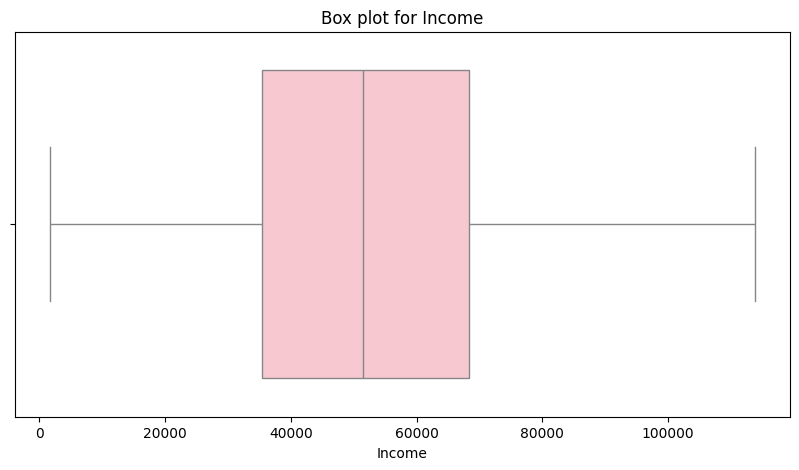

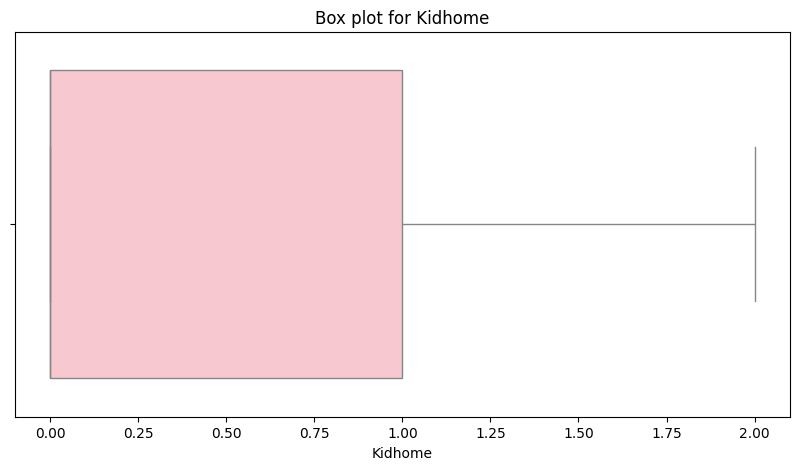

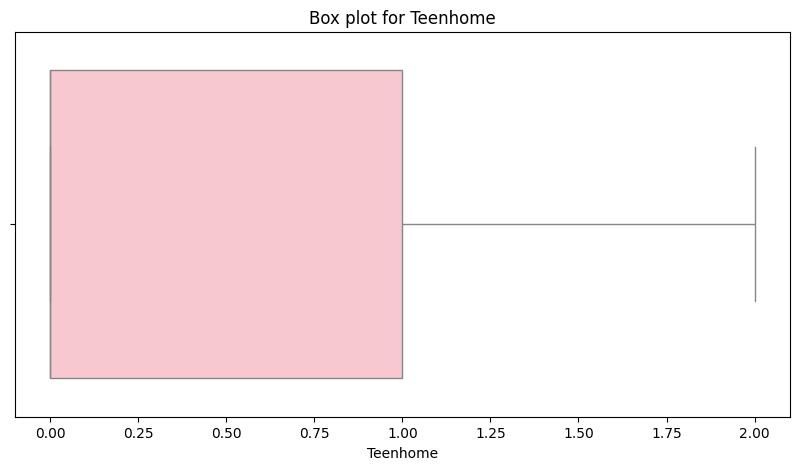

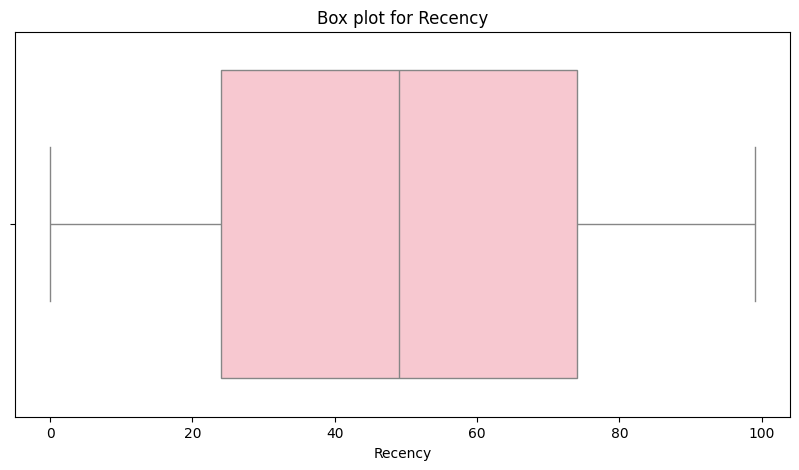

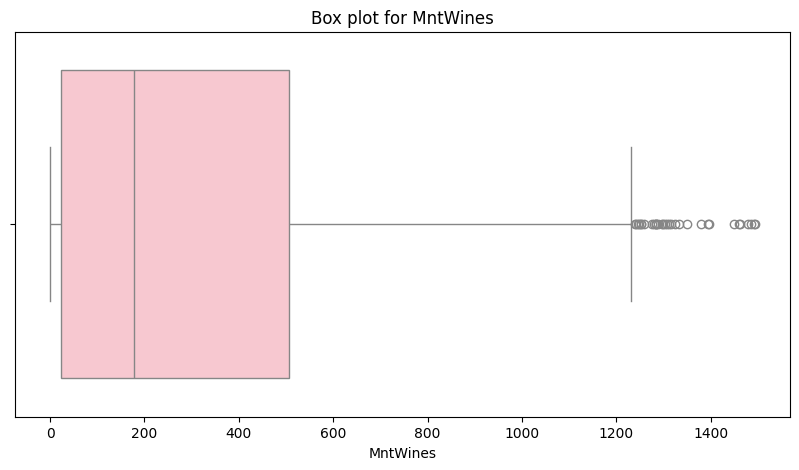

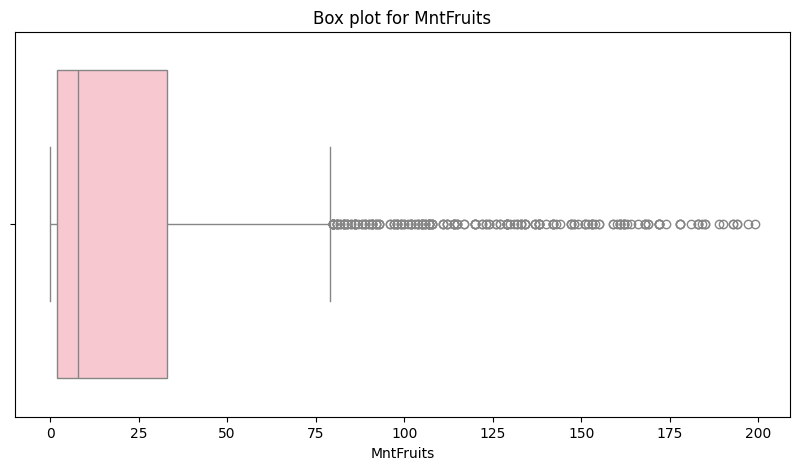

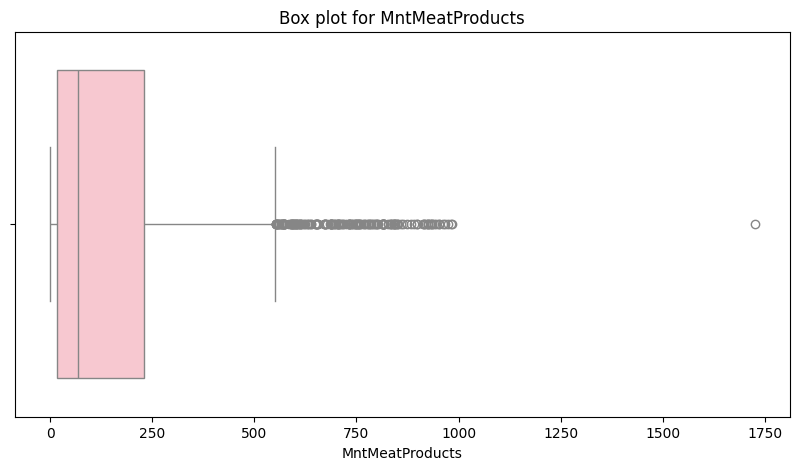

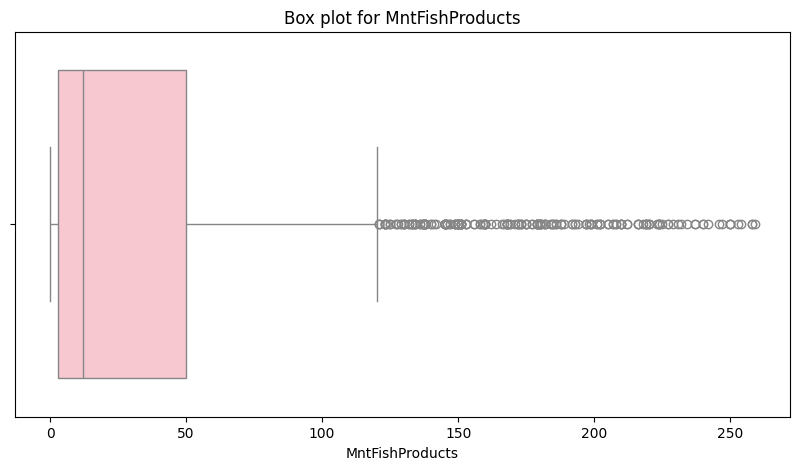

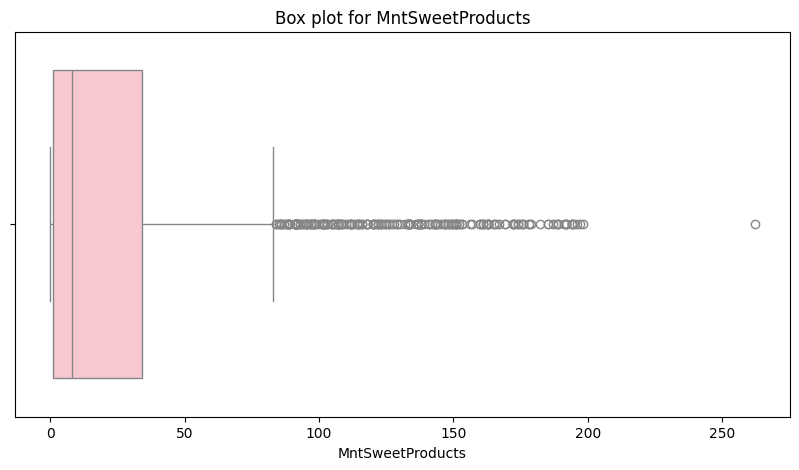

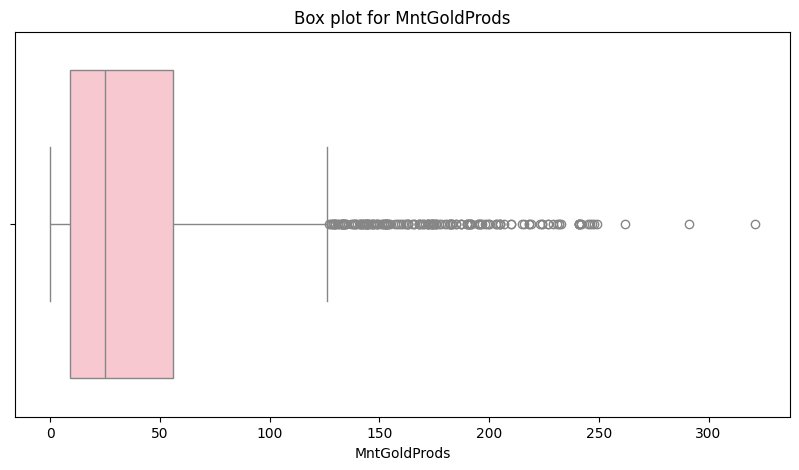

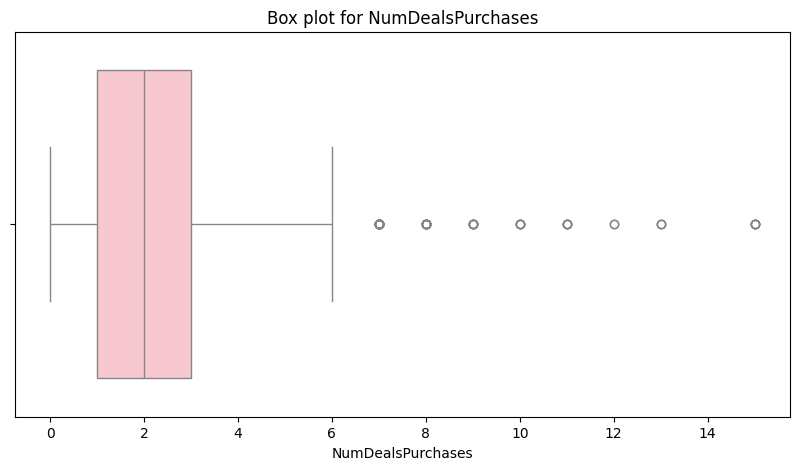

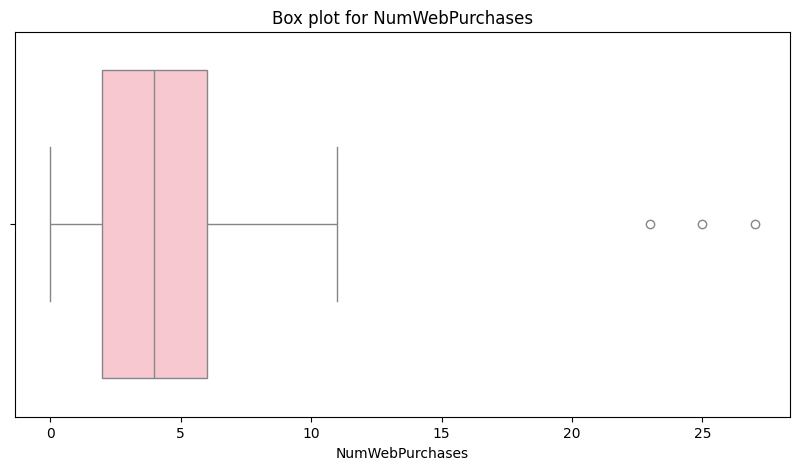

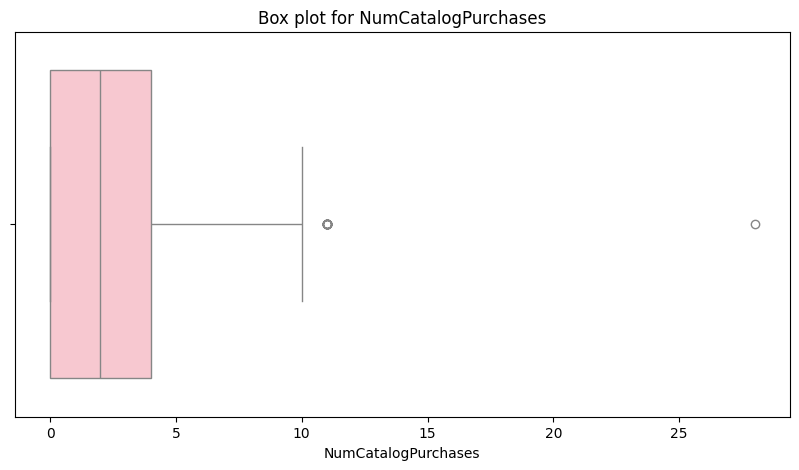

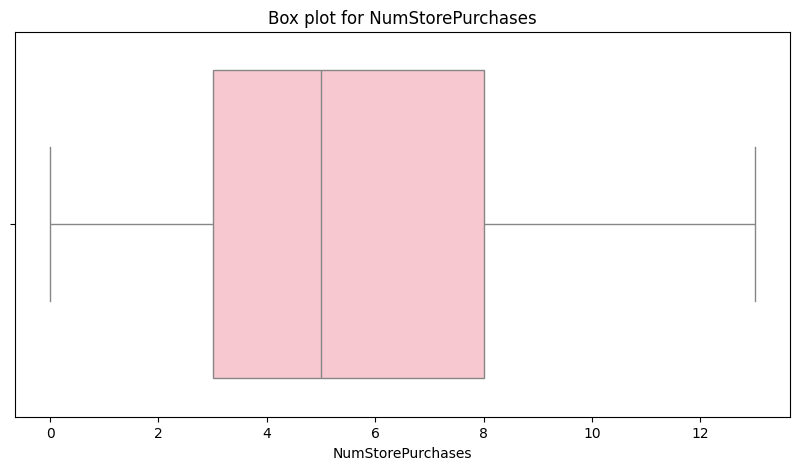

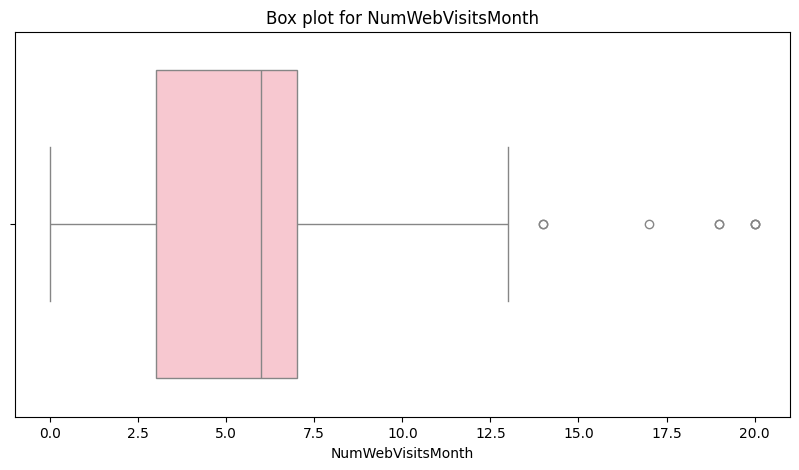

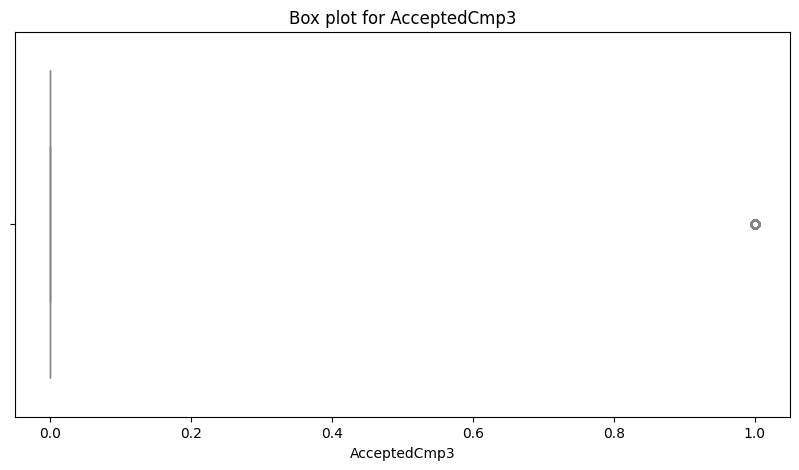

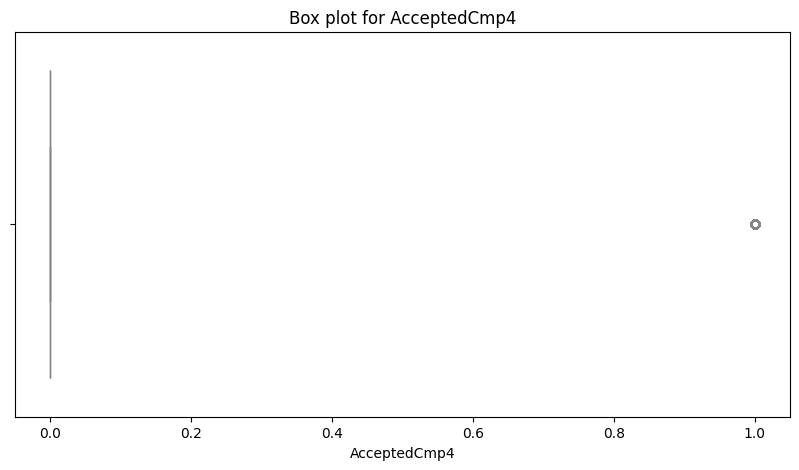

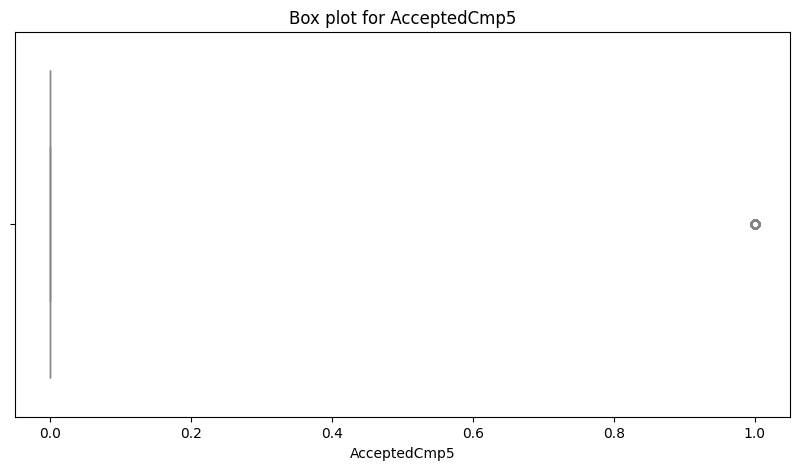

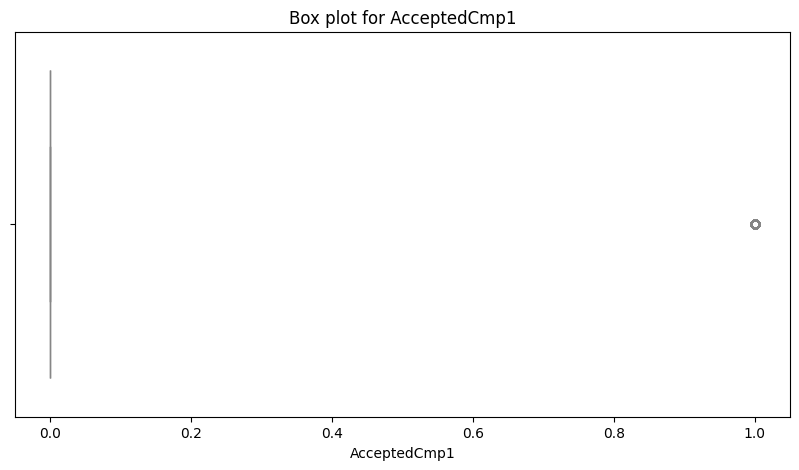

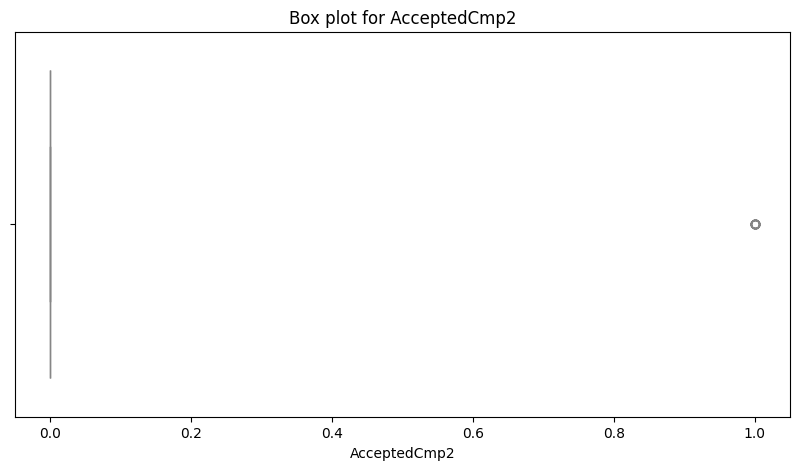

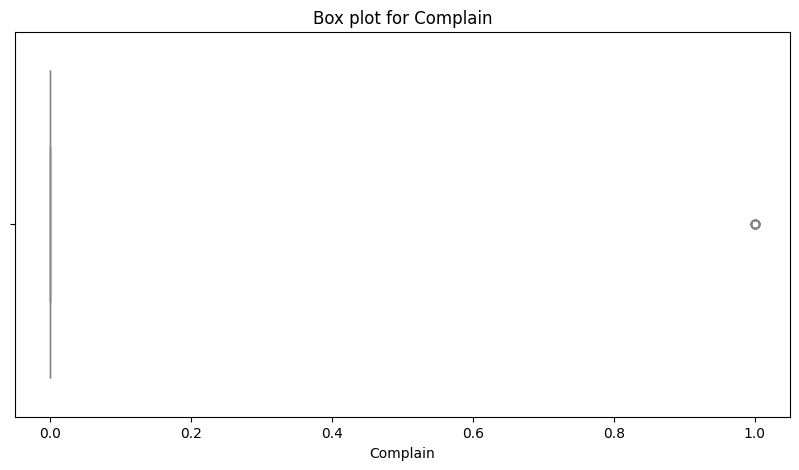

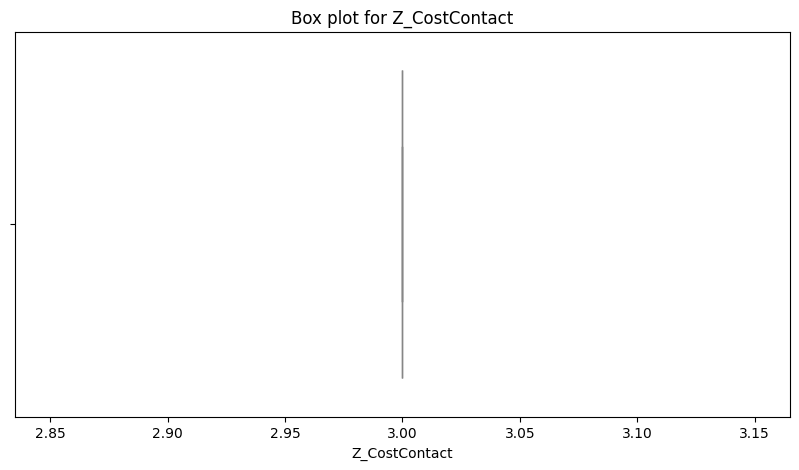

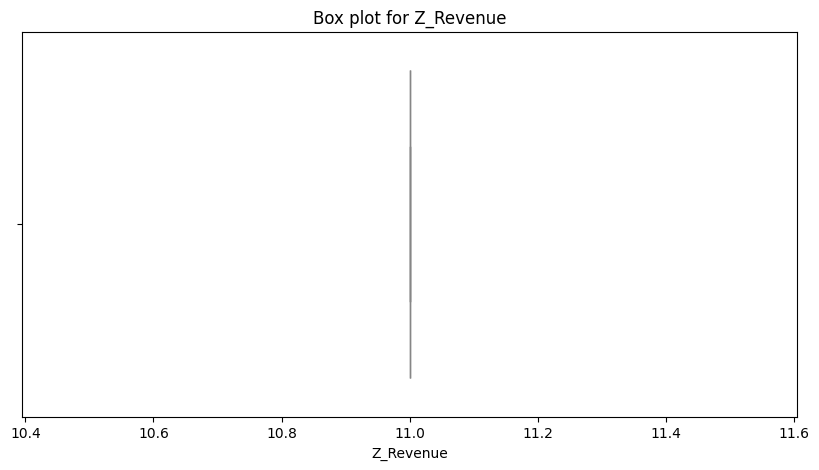

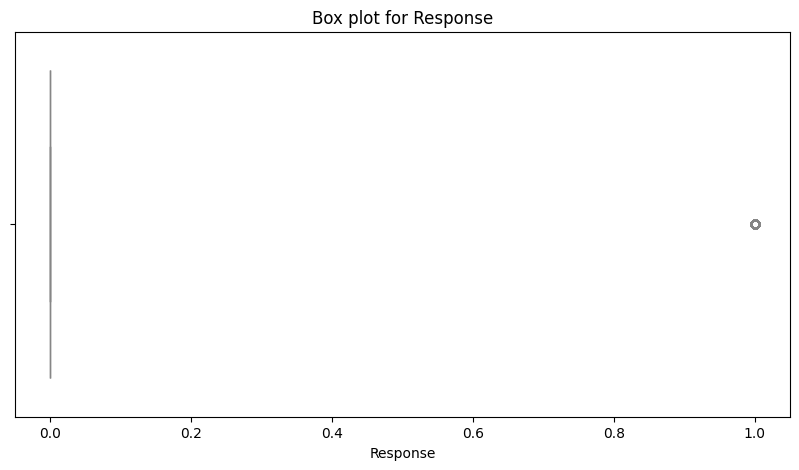

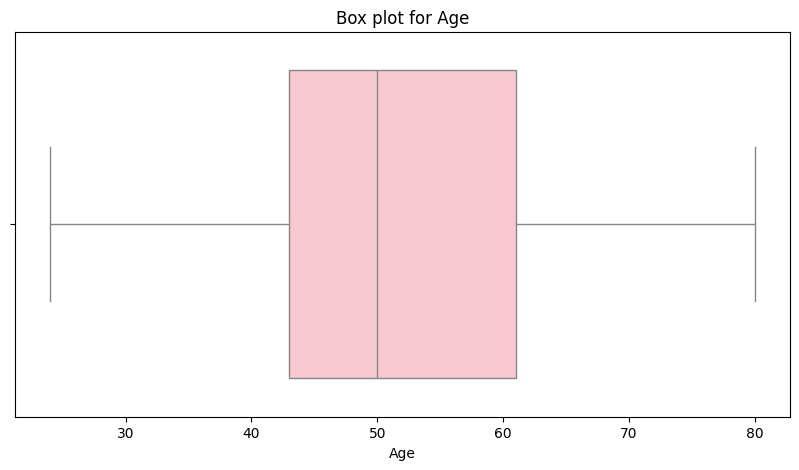

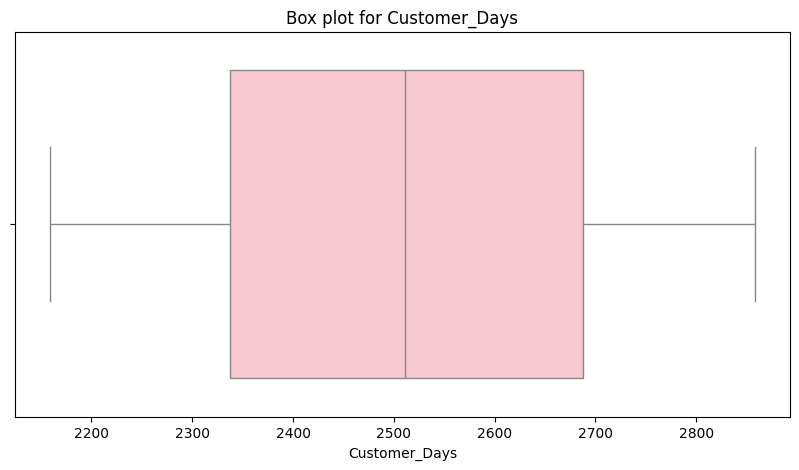

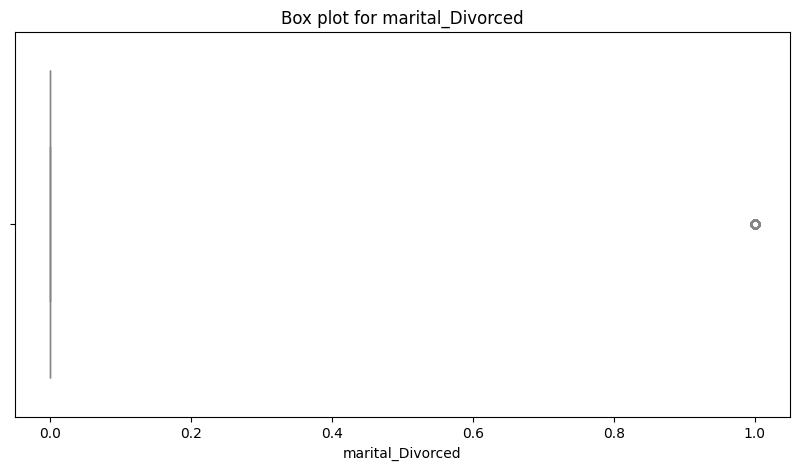

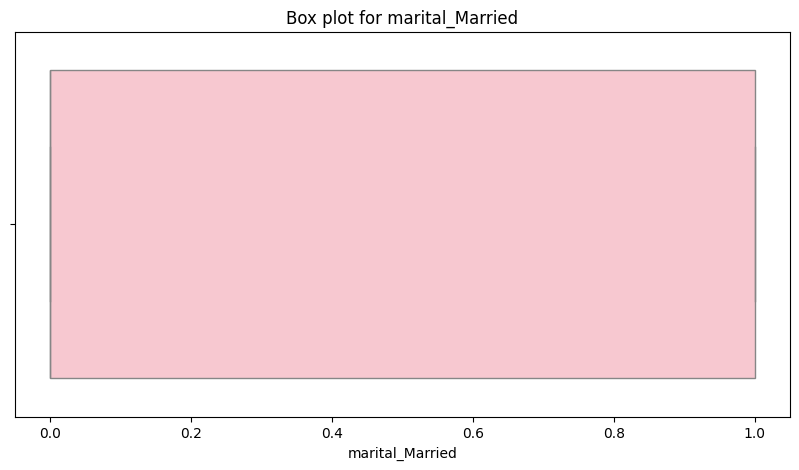

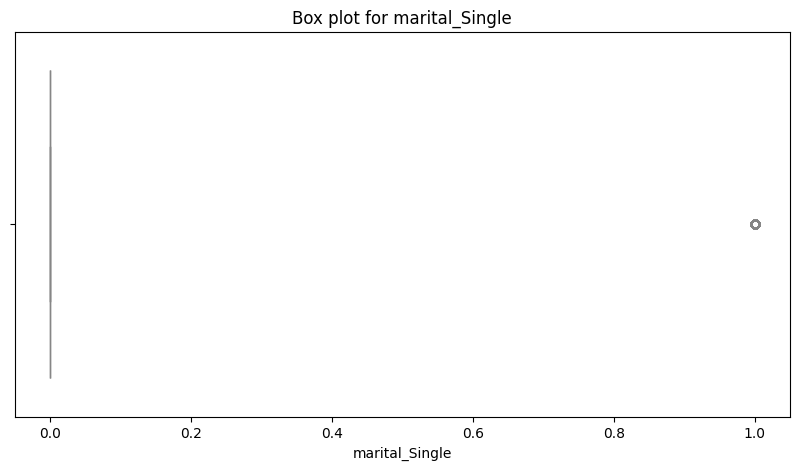

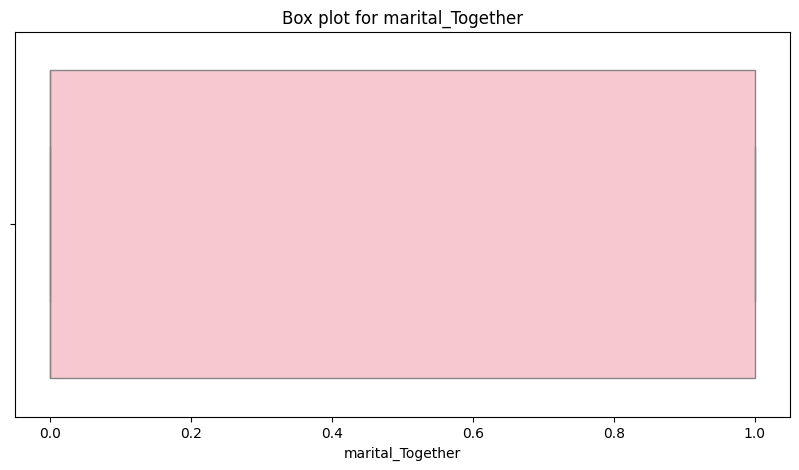

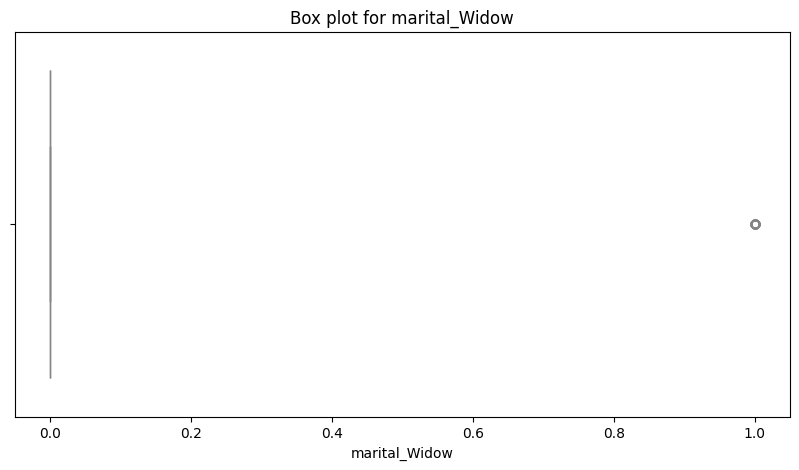

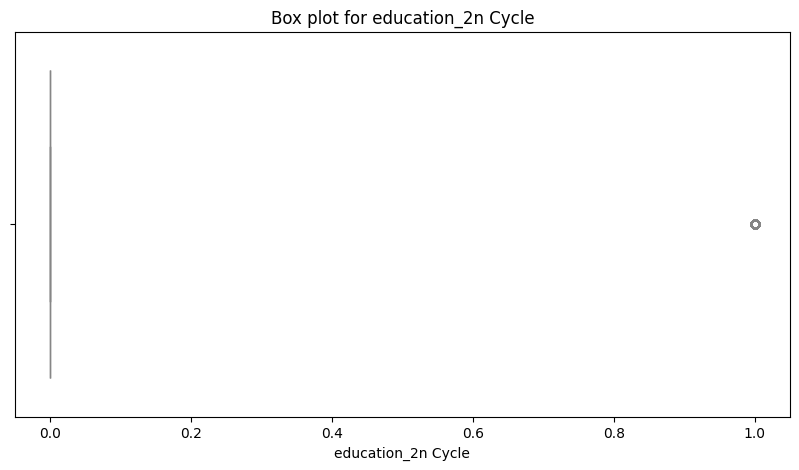

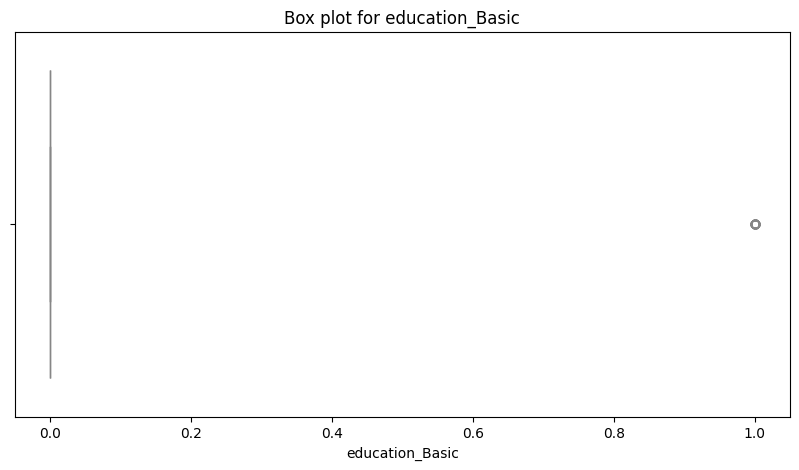

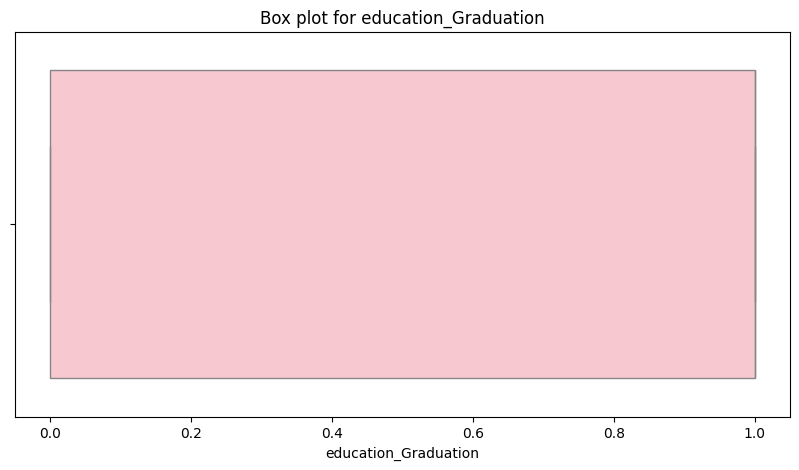

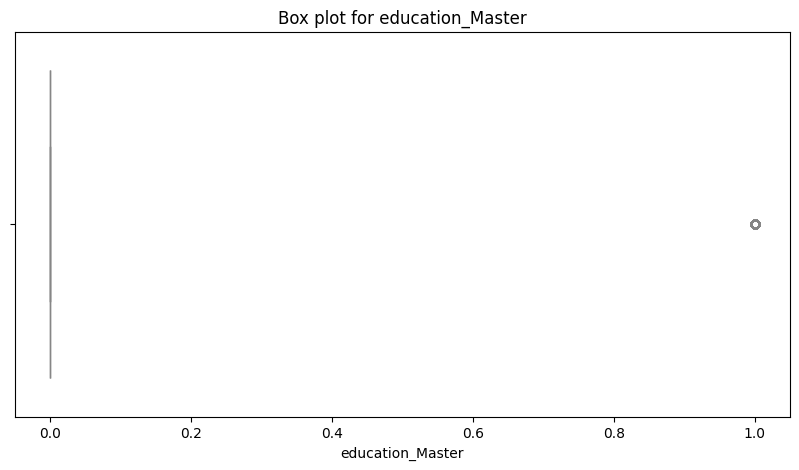

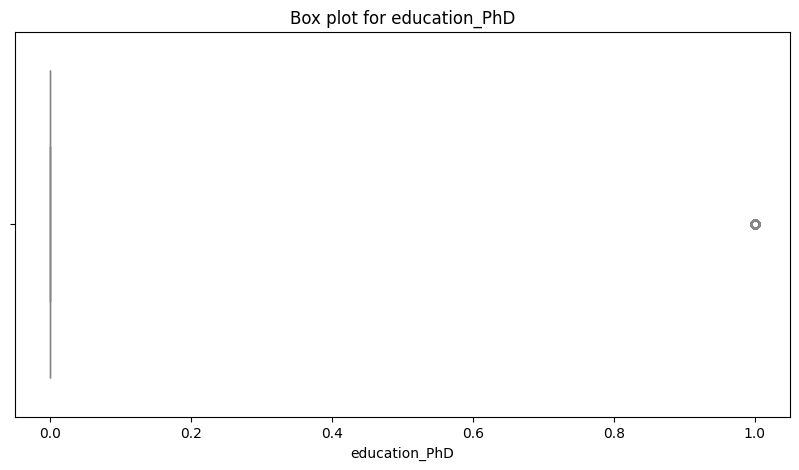

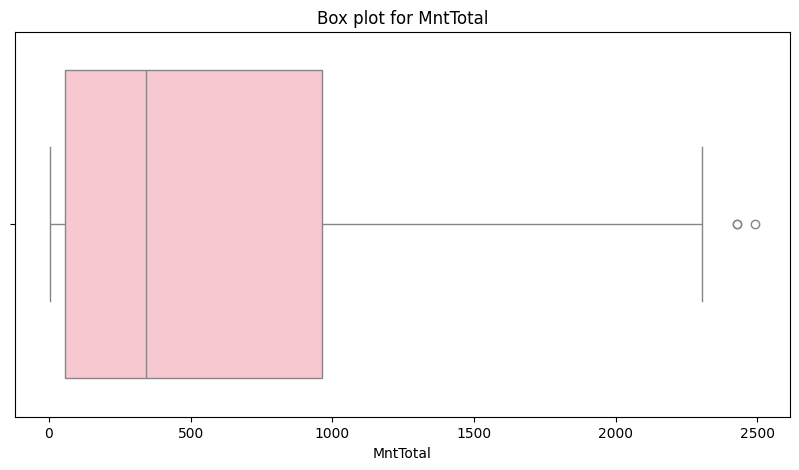

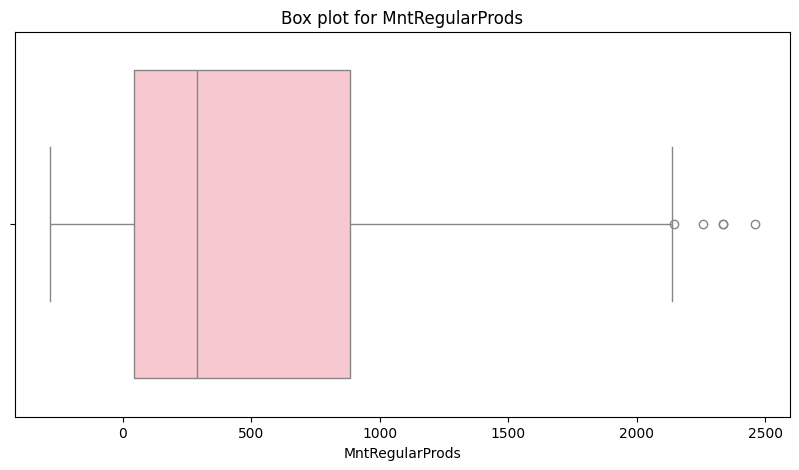

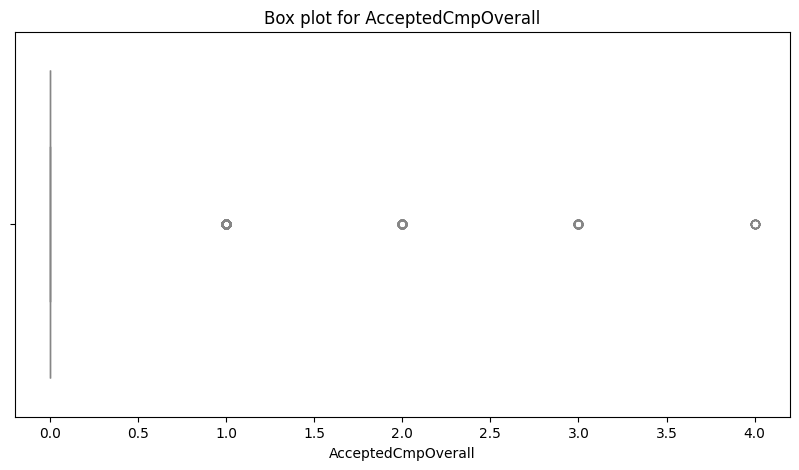

In [ ]:
for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df_cleaned[column], color='pink')
    plt.title(f'Box plot for {column}')
    plt.show()

In [ ]:
# identify outliers using IQR
def identify_outliers_iqr(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return lower_bound, upper_bound

for column in df_cleaned.select_dtypes(include=['float64', 'int64']).columns:
    lower, upper = identify_outliers_iqr(df_cleaned[column])
    outliers = df_cleaned[(df_cleaned[column] < lower) | (df_cleaned[column] > upper)]
    print(f"Outliers in {column}:\n", outliers)

Outliers in Income:
 Empty DataFrame
Columns: [Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response, Age, Customer_Days, marital_Divorced, marital_Married, marital_Single, marital_Together, marital_Widow, education_2n Cycle, education_Basic, education_Graduation, education_Master, education_PhD, MntTotal, MntRegularProds, AcceptedCmpOverall]
Index: []

[0 rows x 39 columns]
Outliers in Kidhome:
 Empty DataFrame
Columns: [Income, Kidhome, Teenhome, Recency, MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds, NumDealsPurchases, NumWebPurchases, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth, AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complai

**Analysis of different types of customers**

<ipython-input-13-8670f80ed44e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=marital_counts, x='Marital Status', y='Frequency', palette='Paired')


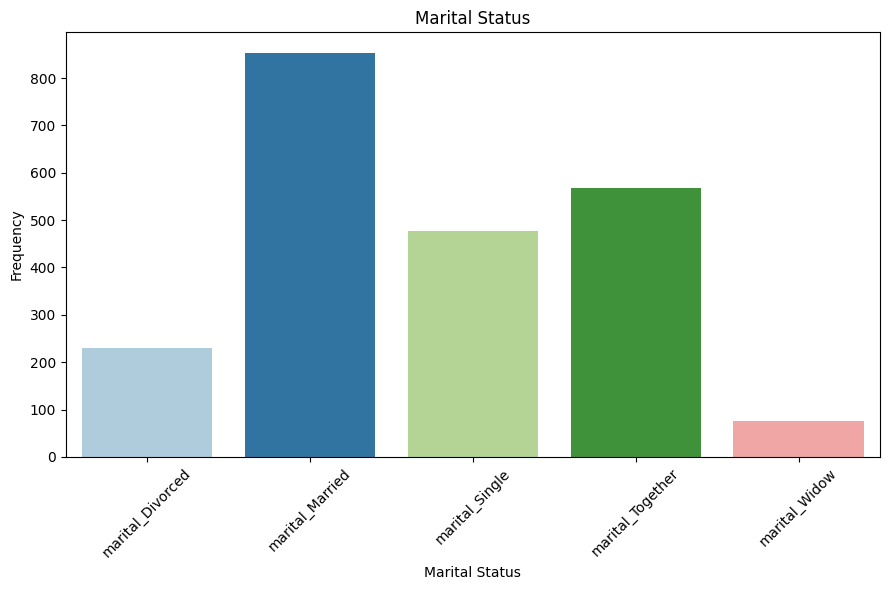

In [ ]:

marital_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']

marital_counts = df[marital_columns].sum().reset_index()
marital_counts.columns = ['Marital Status', 'Frequency']

plt.figure(figsize=(9, 6))
sns.barplot(data=marital_counts, x='Marital Status', y='Frequency', palette='Paired')
plt.title('Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart shows that the highest frequency observed is married individuals indicating that they make up the largest group in the dataset.
On the other hand, widows make up the smallest group.

<ipython-input-15-dede741c390a>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=education_counts, x='Education Level', y='Frequency', palette='Paired')


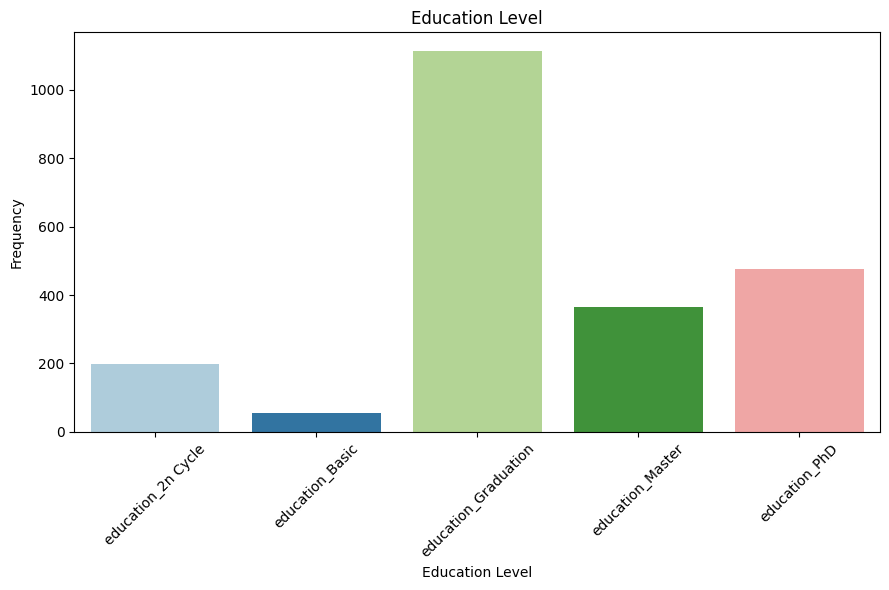

In [ ]:

education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']

education_counts = df[education_columns].sum().reset_index()
education_counts.columns = ['Education Level', 'Frequency']

plt.figure(figsize=(9, 6))
sns.barplot(data=education_counts, x='Education Level', y='Frequency', palette='Paired')
plt.title('Education Level')
plt.xlabel('Education Level')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

From the above bar chart, we can see that 'Graduation' has the highest frequency while 'basic' has the lowest.

<ipython-input-20-b9e864e91d06>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=age_counts, x='Age Group', y='Frequency', palette='Paired')


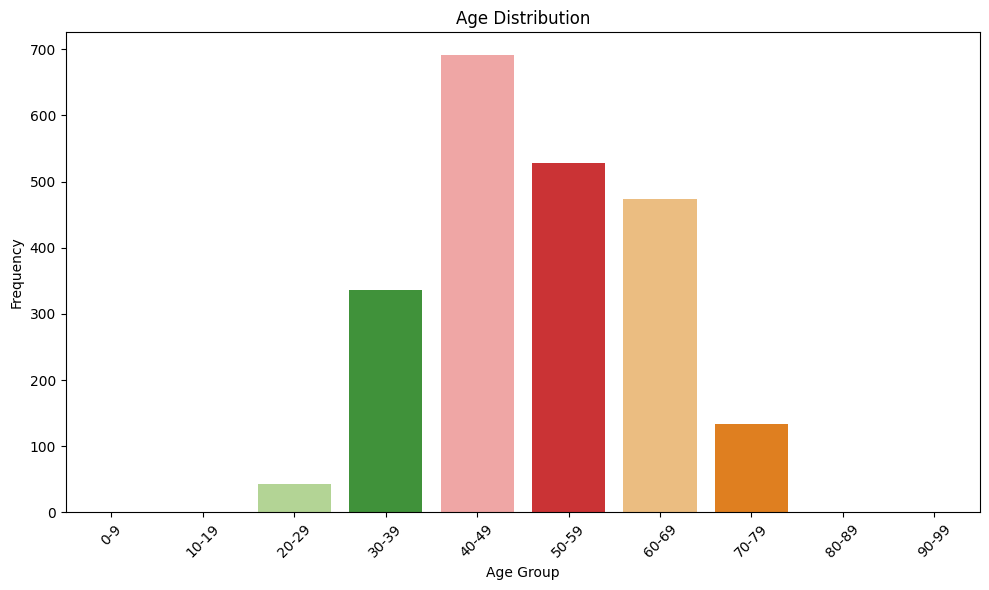

In [ ]:

#age bins
bins = range(0, 101, 10)
labels = [f'{i}-{i + 9}' for i in bins[:-1]]

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

age_counts = df['Age Group'].value_counts().reset_index()
age_counts.columns = ['Age Group', 'Frequency']

plt.figure(figsize=(10, 6))
sns.barplot(data=age_counts, x='Age Group', y='Frequency', palette='Paired')
plt.title('Age Distribution')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

The bar chart shows that the age group 40-49 has the highest frequency. 50-59 and 60-69 also have a considerable frequency. This shows that there is a dominance of middle aged individuals in the dataset.

Younger(20-29) and older(70-79) indiviudals have a much lower frequency.

<ipython-input-21-e2ec55fc3857>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age Group', ax=axes[0], palette='Paired')
<ipython-input-21-e2ec55fc3857>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=marital_counts.index, y=marital_counts.values, ax=axes[1], palette='Paired')
<ipython-input-21-e2ec55fc3857>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=education_counts.index, y=education_counts.values, ax=axes[2], palette='Paired')


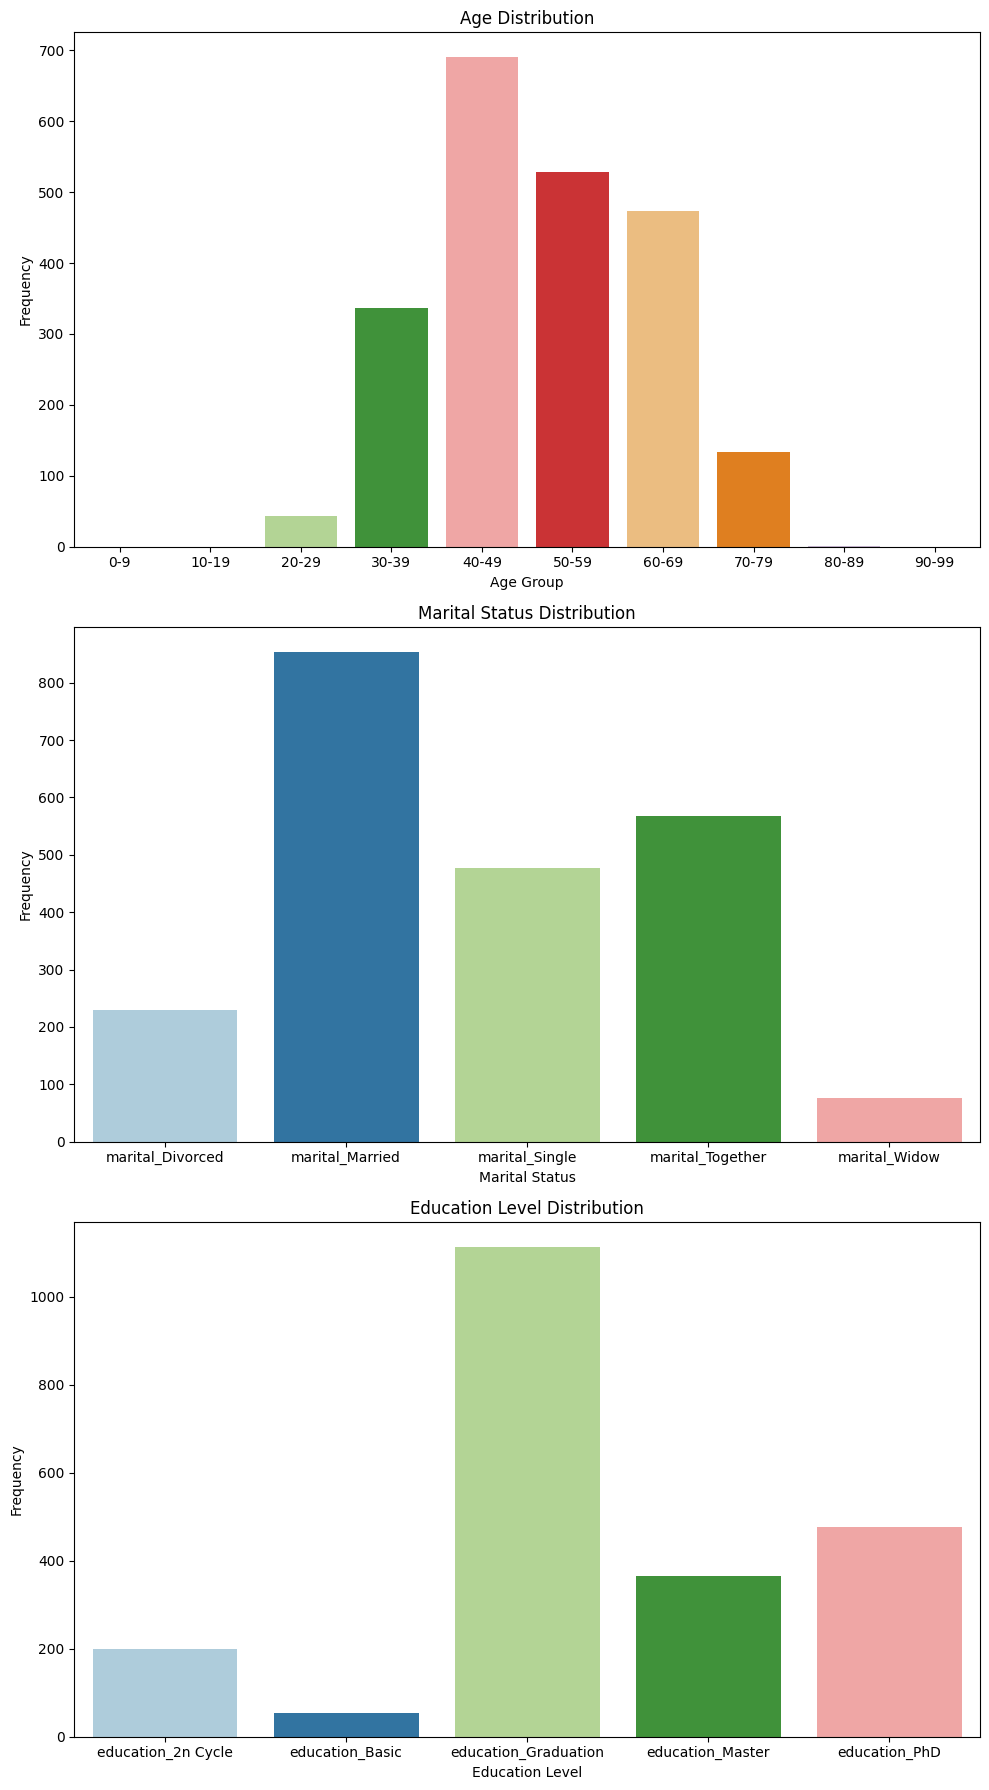

In [ ]:

# age bins
bins = range(0, 101, 10)
labels = [f'{i}-{i + 9}' for i in bins[:-1]]
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# Bar graph for Age Group
sns.countplot(data=df, x='Age Group', ax=axes[0], palette='Paired')
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age Group')
axes[0].set_ylabel('Frequency')

# Bar graph for Marital Status
marital_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
marital_counts = df[marital_columns].sum()
sns.barplot(x=marital_counts.index, y=marital_counts.values, ax=axes[1], palette='Paired')
axes[1].set_title('Marital Status Distribution')
axes[1].set_xlabel('Marital Status')
axes[1].set_ylabel('Frequency')

# Bar graph for Education Level
education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
education_counts = df[education_columns].sum()
sns.barplot(x=education_counts.index, y=education_counts.values, ax=axes[2], palette='Paired')
axes[2].set_title('Education Level Distribution')
axes[2].set_xlabel('Education Level')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
customer_columns = [ 'Age', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
df['MntTotal'] = df.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

# Regular Products
df['MntRegularProds'] = df.loc[:,'MntTotal'] - df.loc[:,'MntGoldProds']

# Campaigns Accepted
df['AcceptedCmpOverall'] = df.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

customer_columns_ext = customer_columns + ['MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall']

customer_ifood_df = df[customer_columns_ext]
customer_ifood_df.head()

Age   Income  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0   63  58138.0        0         0       58       635         88   
1   66  46344.0        1         1       38        11          1   
2   55  71613.0        0         0       26       426         49   
3   36  26646.0        1         0       26        11          4   
4   39  58293.0        1         0       94       173         43   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0              546              172                88  ...             0   
1                6                2                 1  ...             0   
2              127              111                21  ...             0   
3               20               10                 3  ...             0   
4              118               46                27  ...             0   

   AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  MntTotal  \
0             0         0              3         11         1      1529   
1             0         0              3         11         0        21   
2             0         0              3         11         0       734   
3             0         0              3         11         0        48   
4             0         0              3         11         0       407   

   MntRegularProds  MntGoldProds  AcceptedCmpOverall  
0             1441            88                   0  
1               15             6                   0  
2              692            42                   0  
3               43             5                   0  
4              392            15                   0  

[5 rows x 29 columns]

In [ ]:
marital_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
df['Marital_Status'] = df[marital_columns].idxmax(axis=1)
print(df[['Marital_Status'] + marital_columns].head())

     Marital_Status  marital_Divorced  marital_Married  marital_Single  \
0    marital_Single                 0                0               1   
1    marital_Single                 0                0               1   
2  marital_Together                 0                0               0   
3  marital_Together                 0                0               0   
4   marital_Married                 0                1               0   

   marital_Together  marital_Widow  
0                 0              0  
1                 0              0  
2                 1              0  
3                 1              0  
4                 0              0  


In [ ]:
education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
df['Education_Level'] = df[education_columns].idxmax(axis=1)
print(df[['Education_Level'] + education_columns].head())

        Education_Level  education_2n Cycle  education_Basic  \
0  education_Graduation                   0                0   
1  education_Graduation                   0                0   
2  education_Graduation                   0                0   
3  education_Graduation                   0                0   
4         education_PhD                   0                0   

   education_Graduation  education_Master  education_PhD  
0                     1                 0              0  
1                     1                 0              0  
2                     1                 0              0  
3                     1                 0              0  
4                     0                 0              1  


In [ ]:
customer_columns = ['Age','Marital_Status', 'Education_Level','Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
# Sum of purchases
df['MntTotal'] = df.loc[:,['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']].sum(axis=1)

# Regular Products
df['MntRegularProds'] = df.loc[:,'MntTotal'] - df.loc[:,'MntGoldProds']

# Campaigns Accepted
df['AcceptedCmpOverall'] = df.loc[:,['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)

customer_columns_ext = customer_columns + ['MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall']

customer_ifood_df = df[customer_columns_ext]
customer_ifood_df.head()

Marital_Status       Education_Level   Income  Kidhome  Teenhome  \
0    marital_Single  education_Graduation  58138.0        0         0   
1    marital_Single  education_Graduation  46344.0        1         1   
2  marital_Together  education_Graduation  71613.0        0         0   
3  marital_Together  education_Graduation  26646.0        1         0   
4   marital_Married         education_PhD  58293.0        1         0   

   Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  \
0       58       635         88              546              172  ...   
1       38        11          1                6                2  ...   
2       26       426         49              127              111  ...   
3       26        11          4               20               10  ...   
4       94       173         43              118               46  ...   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0              3         11         1   
1             0             0         0              3         11         0   
2             0             0         0              3         11         0   
3             0             0         0              3         11         0   
4             0             0         0              3         11         0   

   MntTotal  MntRegularProds  MntGoldProds  AcceptedCmpOverall  
0      1529             1441            88                   0  
1        21               15             6                   0  
2       734              692            42                   0  
3        48               43             5                   0  
4       407              392            15                   0  

[5 rows x 30 columns]

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Income'}>,
        <Axes: title={'center': 'Kidhome'}>],
       [<Axes: title={'center': 'Teenhome'}>,
        <Axes: title={'center': 'MntTotal'}>,
        <Axes: title={'center': 'MntRegularProds'}>],
       [<Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'MntGoldProds'}>,
        <Axes: title={'center': 'AcceptedCmpOverall'}>]], dtype=object)

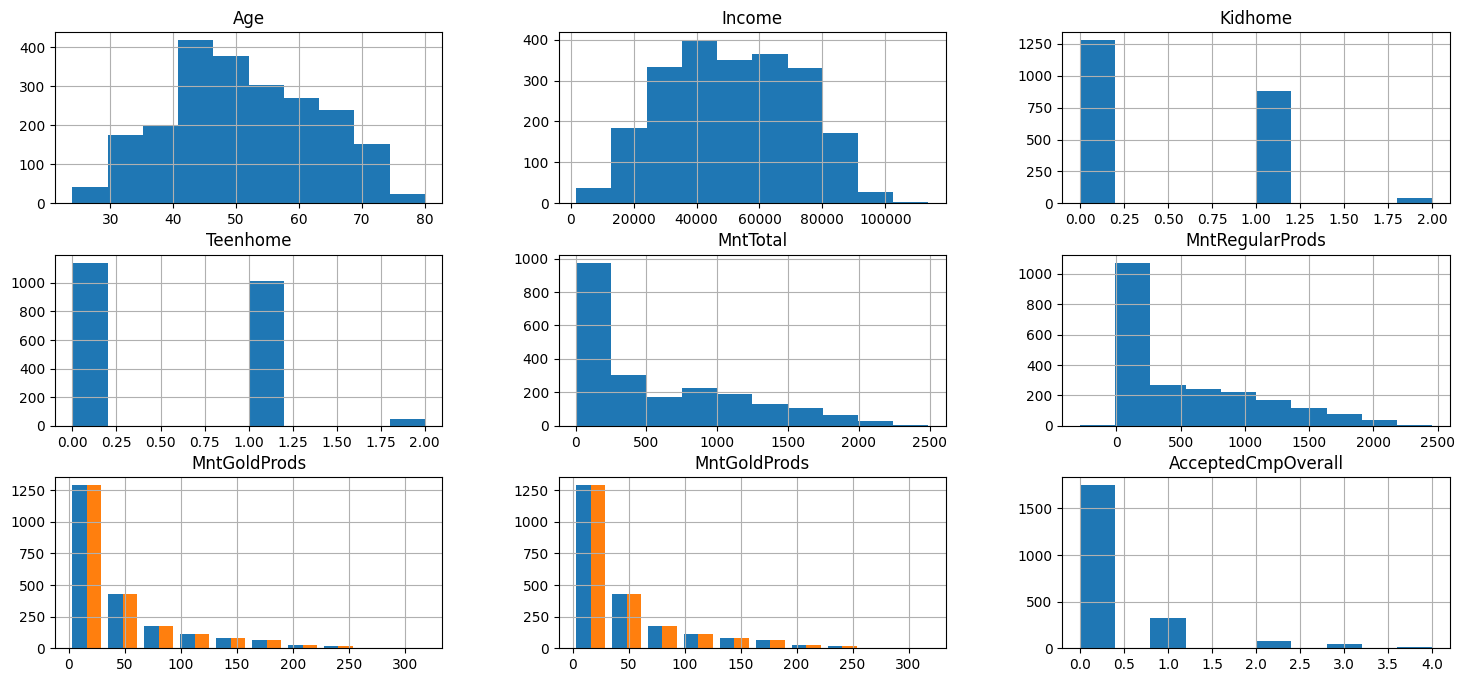

In [ ]:
customer_ifood_df.hist( column = ['Age', 'Income', 'Kidhome', 'Teenhome', 'MntTotal', 'MntRegularProds', 'MntGoldProds', 'AcceptedCmpOverall'], figsize=(18,8))

**Correlation analysis and visualization using heatmap for key features**

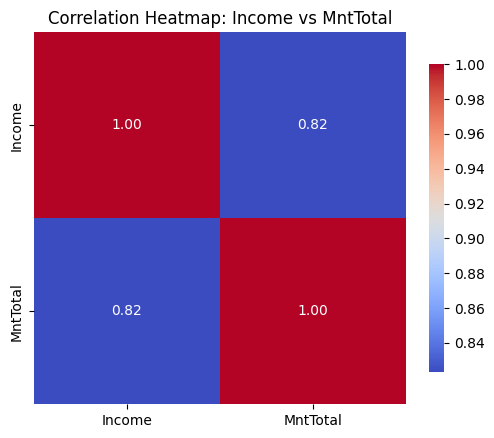

In [ ]:
#correlation matrix
correlation_matrix = df[['Income', 'MntTotal']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap: Income vs MntTotal')
plt.show()

As shown above, as income increases, the total amount spent increases as well. This indicates a positive correlation.

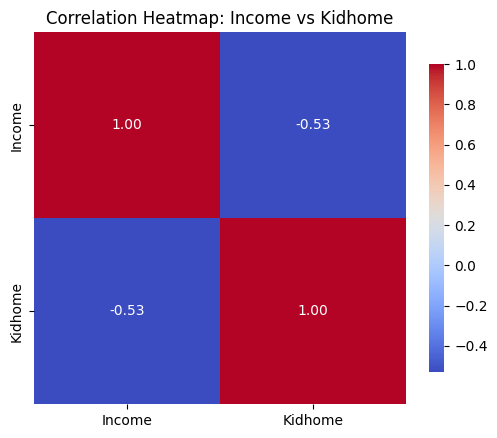

In [ ]:
correlation_matrix = df[['Income', 'Kidhome']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap: Income vs Kidhome')
plt.show()

As Kidhome increases, income decreases resulting in a negative correlation.


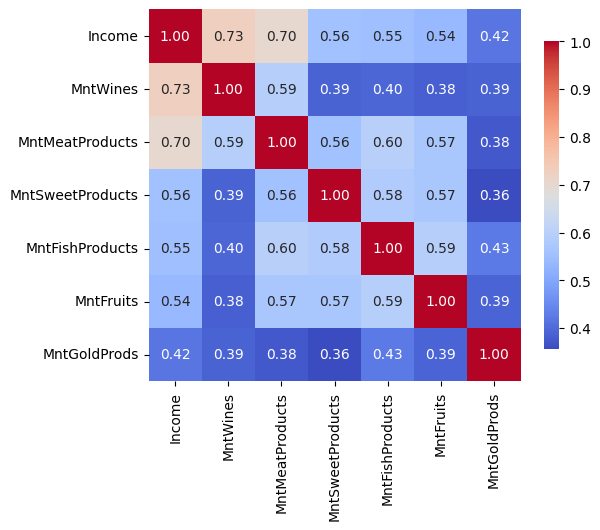

In [ ]:
correlation_matrix = df[['Income', 'MntWines', 'MntMeatProducts', 'MntSweetProducts', 'MntFishProducts','MntFruits', 'MntGoldProds']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.show()

The above heatmap shows a positive relationship of the columns with varying levels

**Results:**

As income increases the amount spent of different product also increases.But income decreases as Kidhome increases.

#**Customer Segmentation using K-means**

In [ ]:
education_columns = ['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD']
df['Education_Level'] = df[education_columns].idxmax(axis=1)

marital_columns = ['marital_Divorced', 'marital_Married', 'marital_Single', 'marital_Together', 'marital_Widow']
df['Marital_Status'] = df[marital_columns].idxmax(axis=1)




In [ ]:
#Normalization
relevant_features = [
    'Income',
    'Age',
    'Education_Level',
    'Marital_Status',
    'MntWines',
    'MntMeatProducts',
    'MntSweetProducts',
    'MntFishProducts',
    'MntFruits',
    'MntGoldProds'
]

df_encoded = pd.get_dummies(df[relevant_features], drop_first=True)

# Standardization
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_encoded)



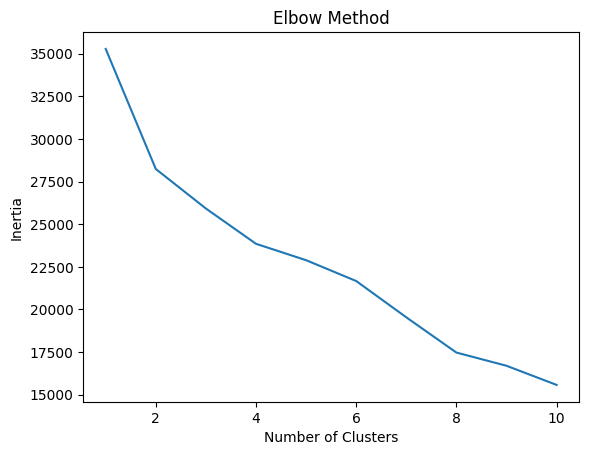

In [ ]:

inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

**K=3**

In [ ]:

optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_data)

In [ ]:
df['Cluster'] = df['Cluster'].astype(int)

# numeric columns for aggregation
numeric_cols = [
    'Income',
    'Age',
    'MntWines',
    'MntMeatProducts',
    'MntSweetProducts',
    'MntFishProducts',
    'MntFruits',
    'MntGoldProds'
]

cluster_profiles = df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profiles)

               Income        Age    MntWines  MntMeatProducts  \
Cluster                                                         
0        74746.162671  51.910959  597.809932       430.724315   
1        40215.428875  49.673036  155.832272        53.730361   
2        40574.533243  49.715061  141.611940        58.621438   
3        51646.639225  54.029056  358.854722       107.648910   

         MntSweetProducts  MntFishProducts  MntFruits  MntGoldProds  
Cluster                                                              
0               74.905822       101.970890  71.929795     86.071918  
1                9.309979        14.547771   9.552017     28.131635  
2                9.529172        13.339213   9.211669     30.500678  
3               11.295400        16.995157  11.922518     27.000000  


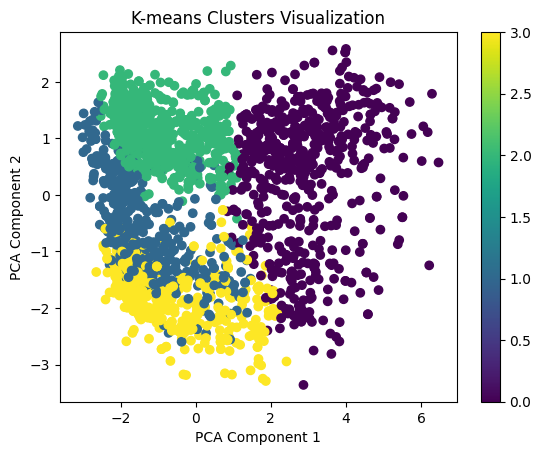

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_df = pca.fit_transform(scaled_data)
plt.scatter(reduced_df[:, 0], reduced_df[:, 1], c=df['Cluster'])
plt.title("K-means Clusters Visualization")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar()
plt.show()

In [ ]:
df['Cluster'] = df['Cluster'].astype(int)


numeric_cols = [
    'Income',
    'Age',
    'MntWines',
    'MntMeatProducts',
    'MntSweetProducts',
    'MntFishProducts',
    'MntFruits',
    'MntGoldProds'
]


cluster_profiles = df.groupby('Cluster')[numeric_cols].mean()
print(cluster_profiles)

               Income        Age    MntWines  MntMeatProducts  \
Cluster                                                         
0        74746.162671  51.910959  597.809932       430.724315   
1        40215.428875  49.673036  155.832272        53.730361   
2        40574.533243  49.715061  141.611940        58.621438   
3        51646.639225  54.029056  358.854722       107.648910   

         MntSweetProducts  MntFishProducts  MntFruits  MntGoldProds  
Cluster                                                              
0               74.905822       101.970890  71.929795     86.071918  
1                9.309979        14.547771   9.552017     28.131635  
2                9.529172        13.339213   9.211669     30.500678  
3               11.295400        16.995157  11.922518     27.000000  


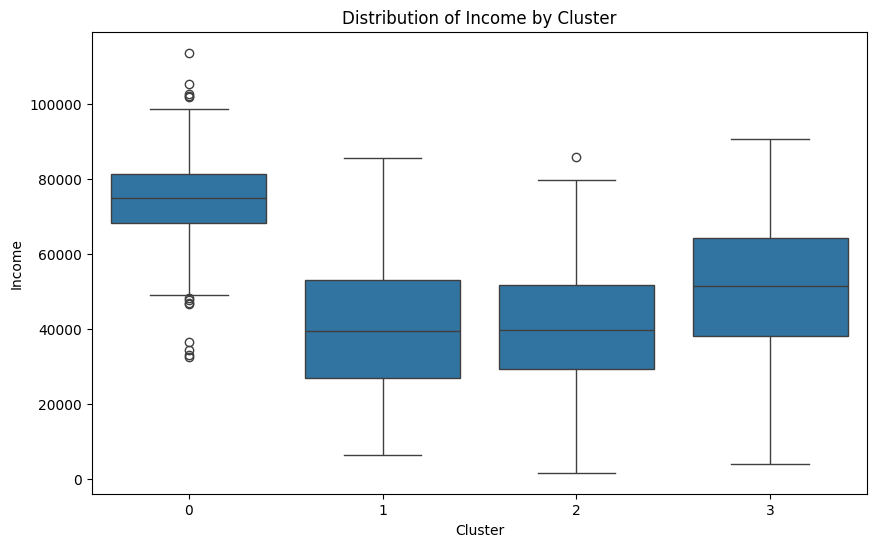

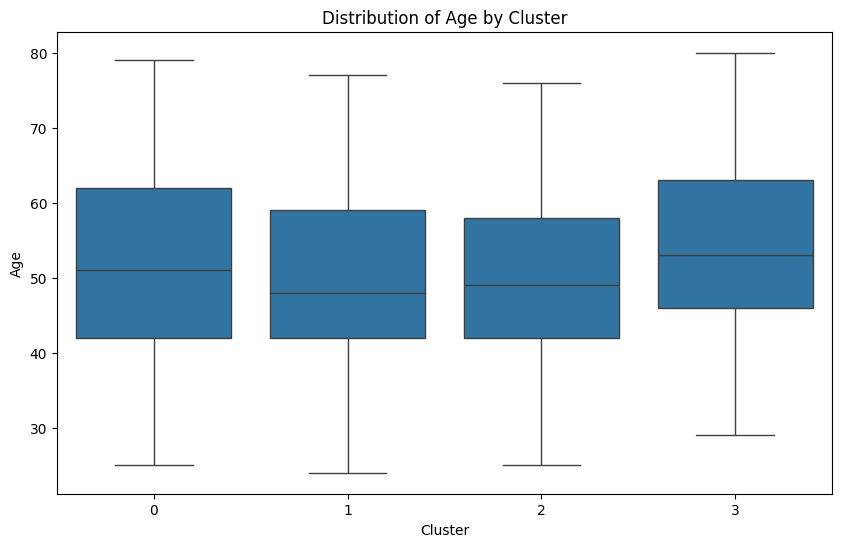

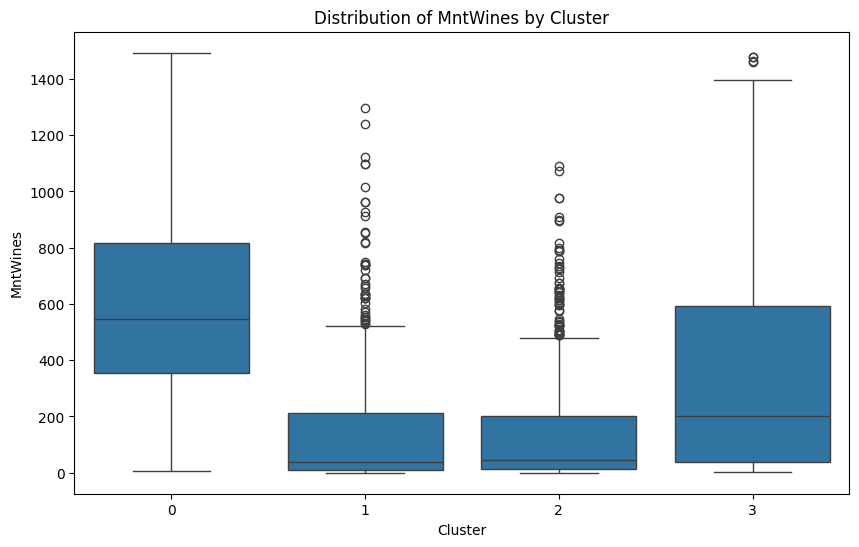

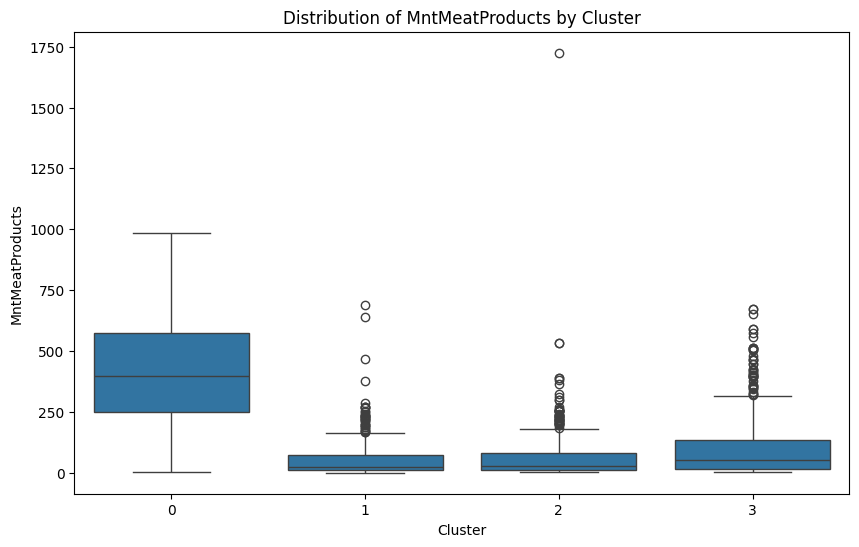

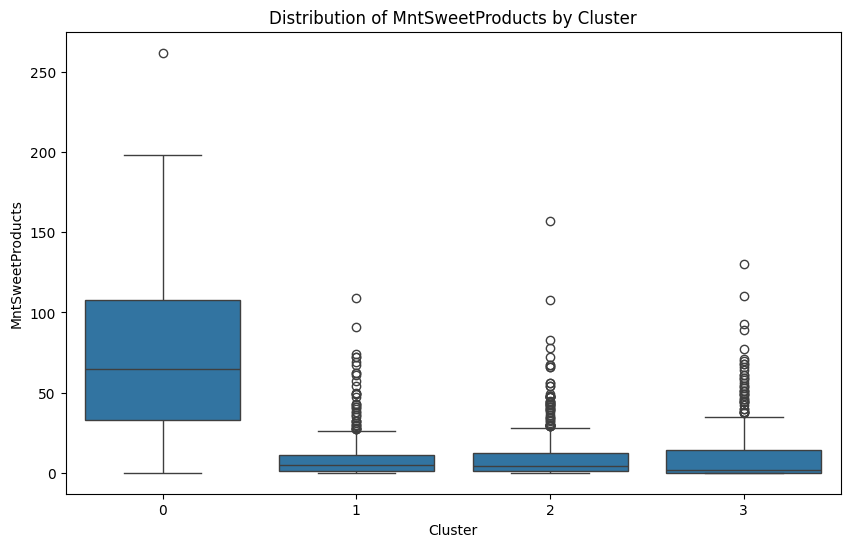

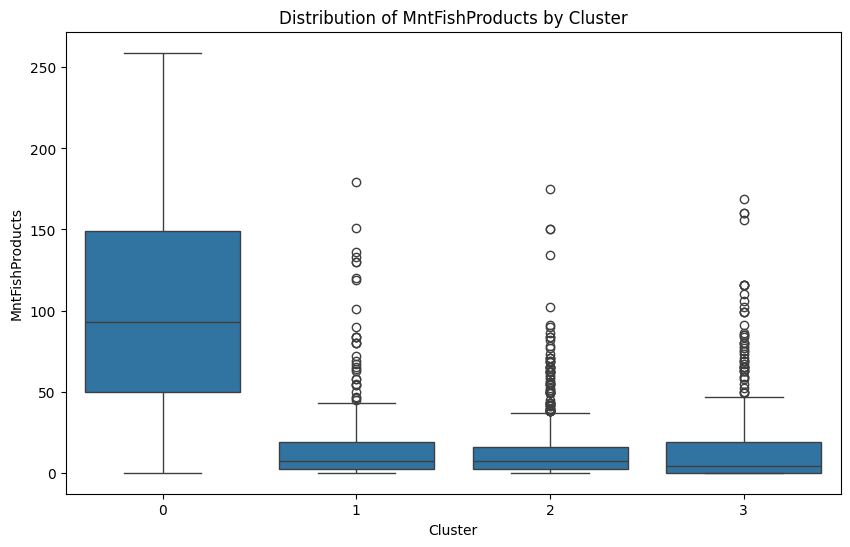

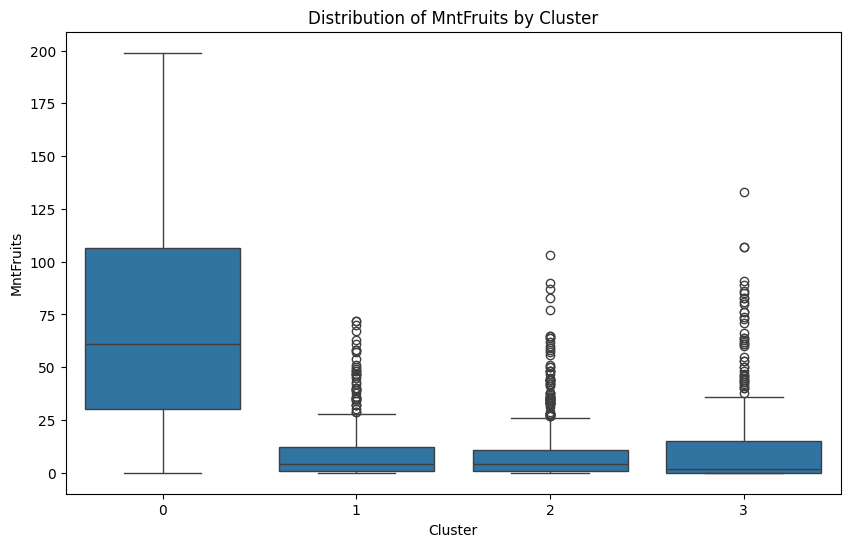

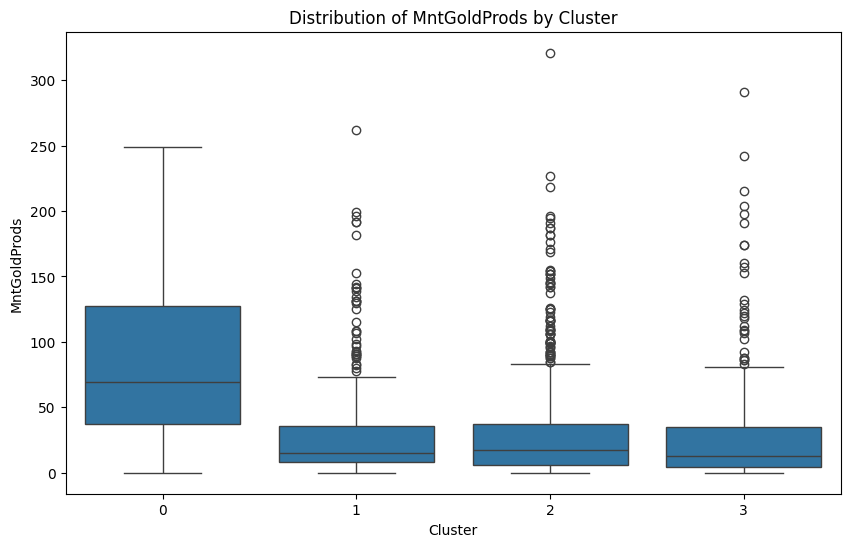

In [ ]:
numeric_cols = [
    'Income',
    'Age',
    'MntWines',
    'MntMeatProducts',
    'MntSweetProducts',
    'MntFishProducts',
    'MntFruits',
    'MntGoldProds'
]


for feature in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Cluster', y=feature, data=df)
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

**Exploration of how key features vary across clusters**

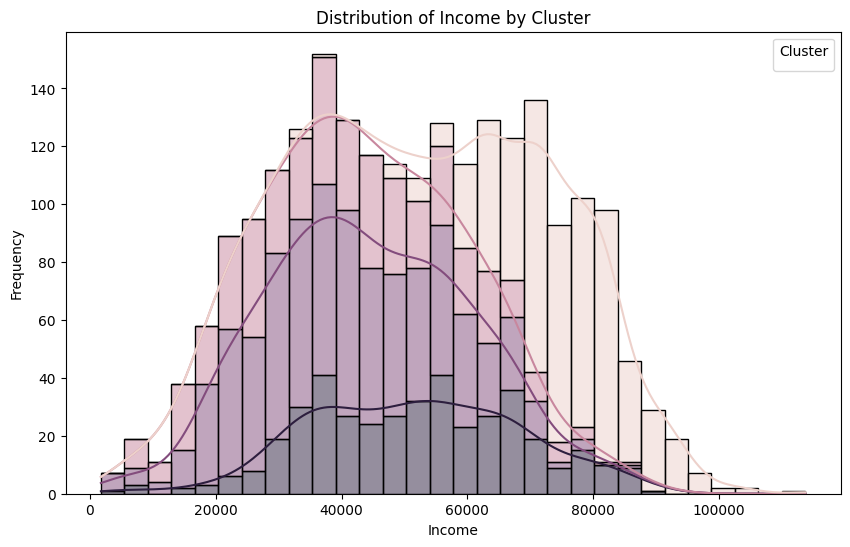

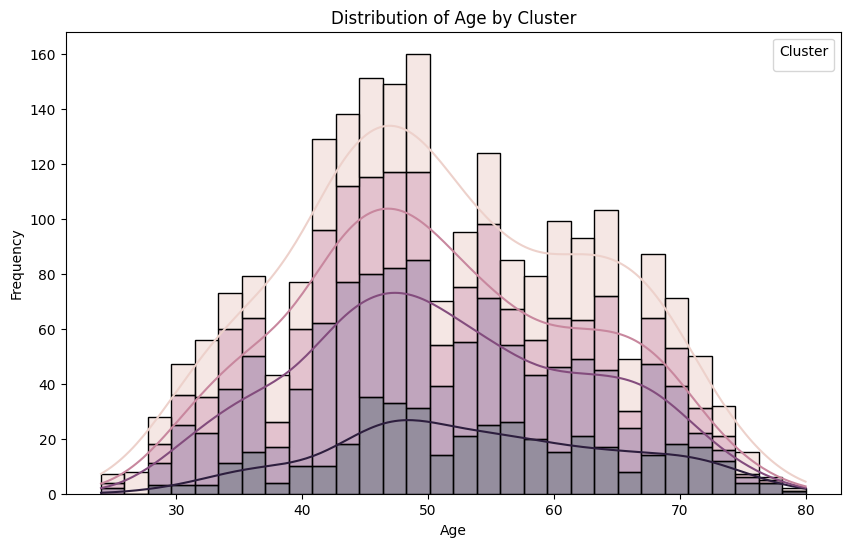

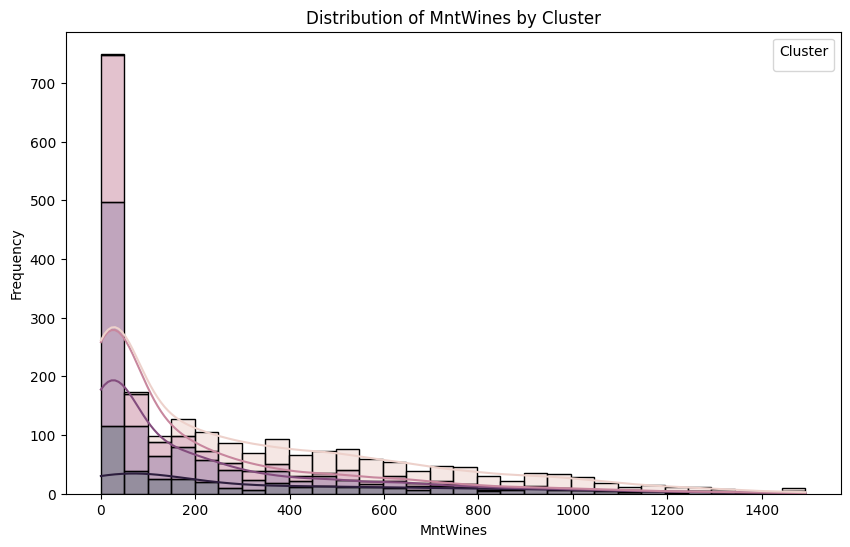

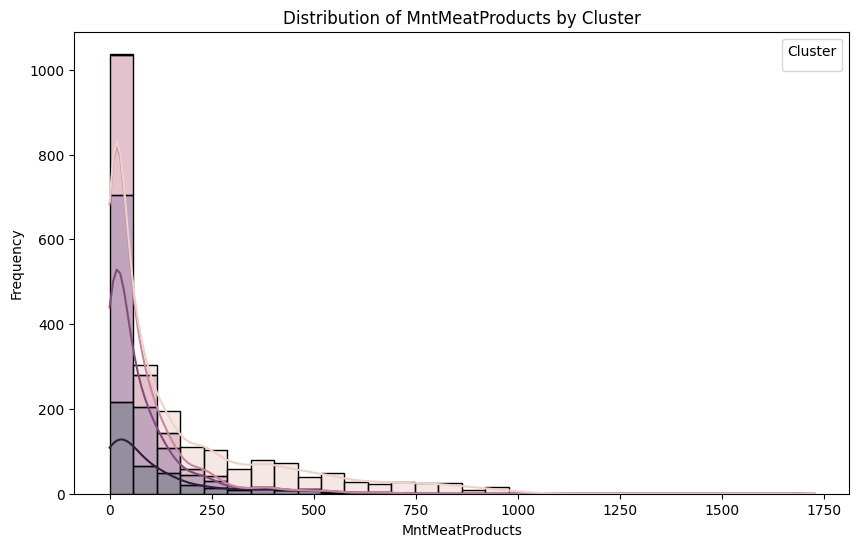

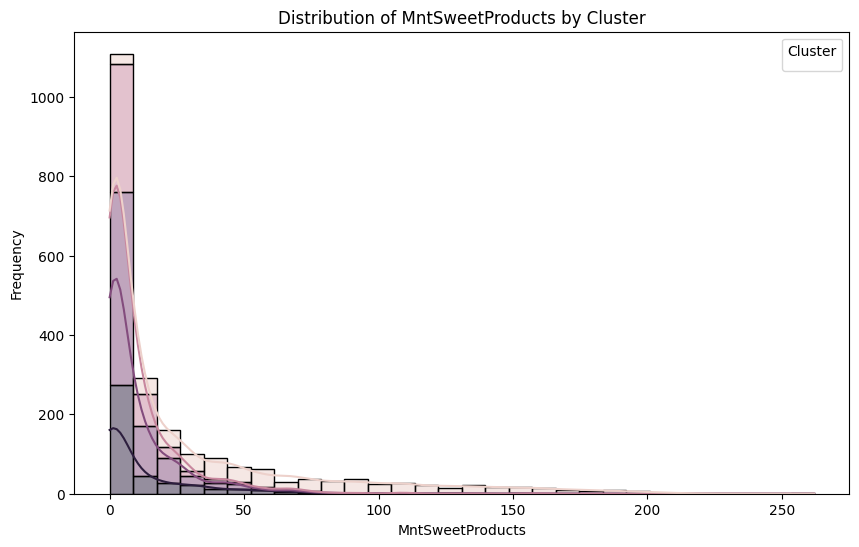

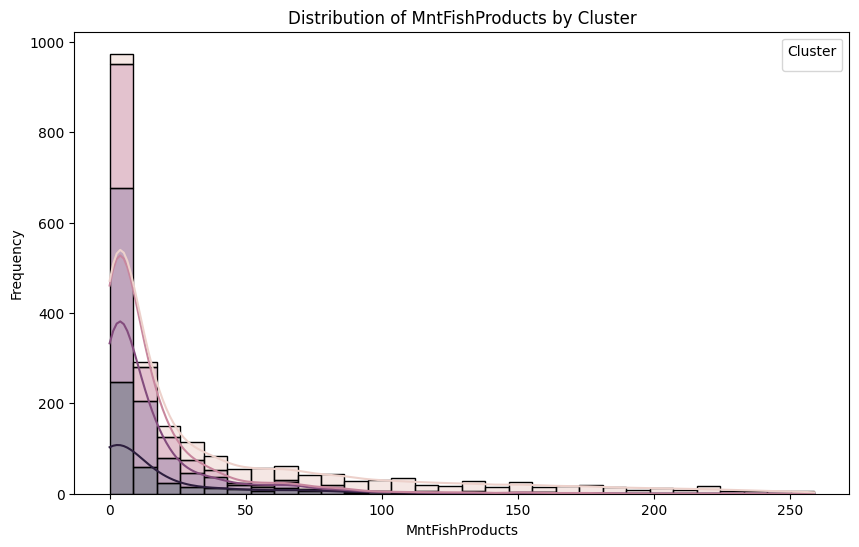

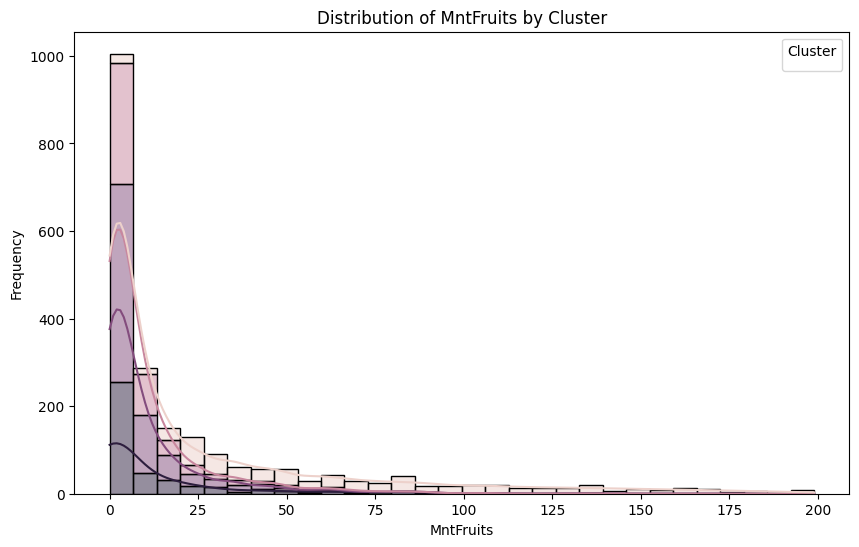

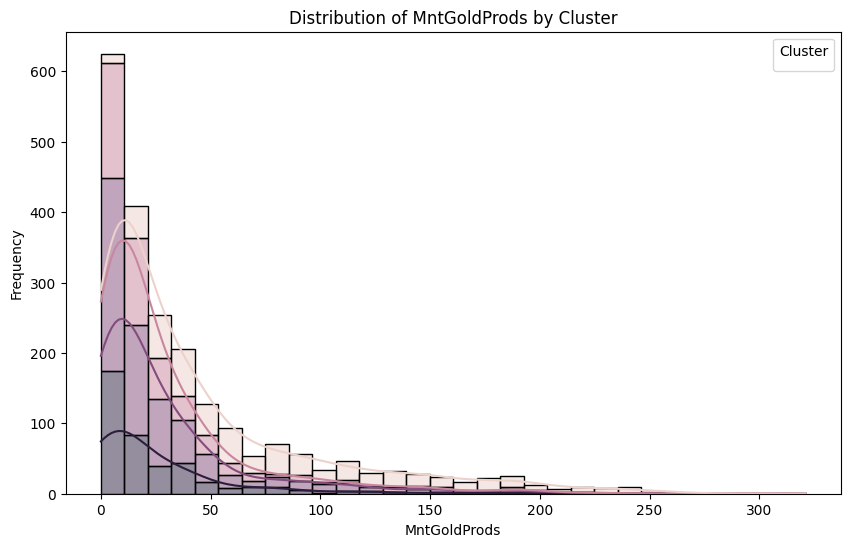

In [ ]:

for feature in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(data=df, x=feature, hue='Cluster', multiple="stack", bins=30, kde=True)  # Adding KDE for smoothness
    plt.title(f'Distribution of {feature} by Cluster')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.legend(title='Cluster')
    plt.show()

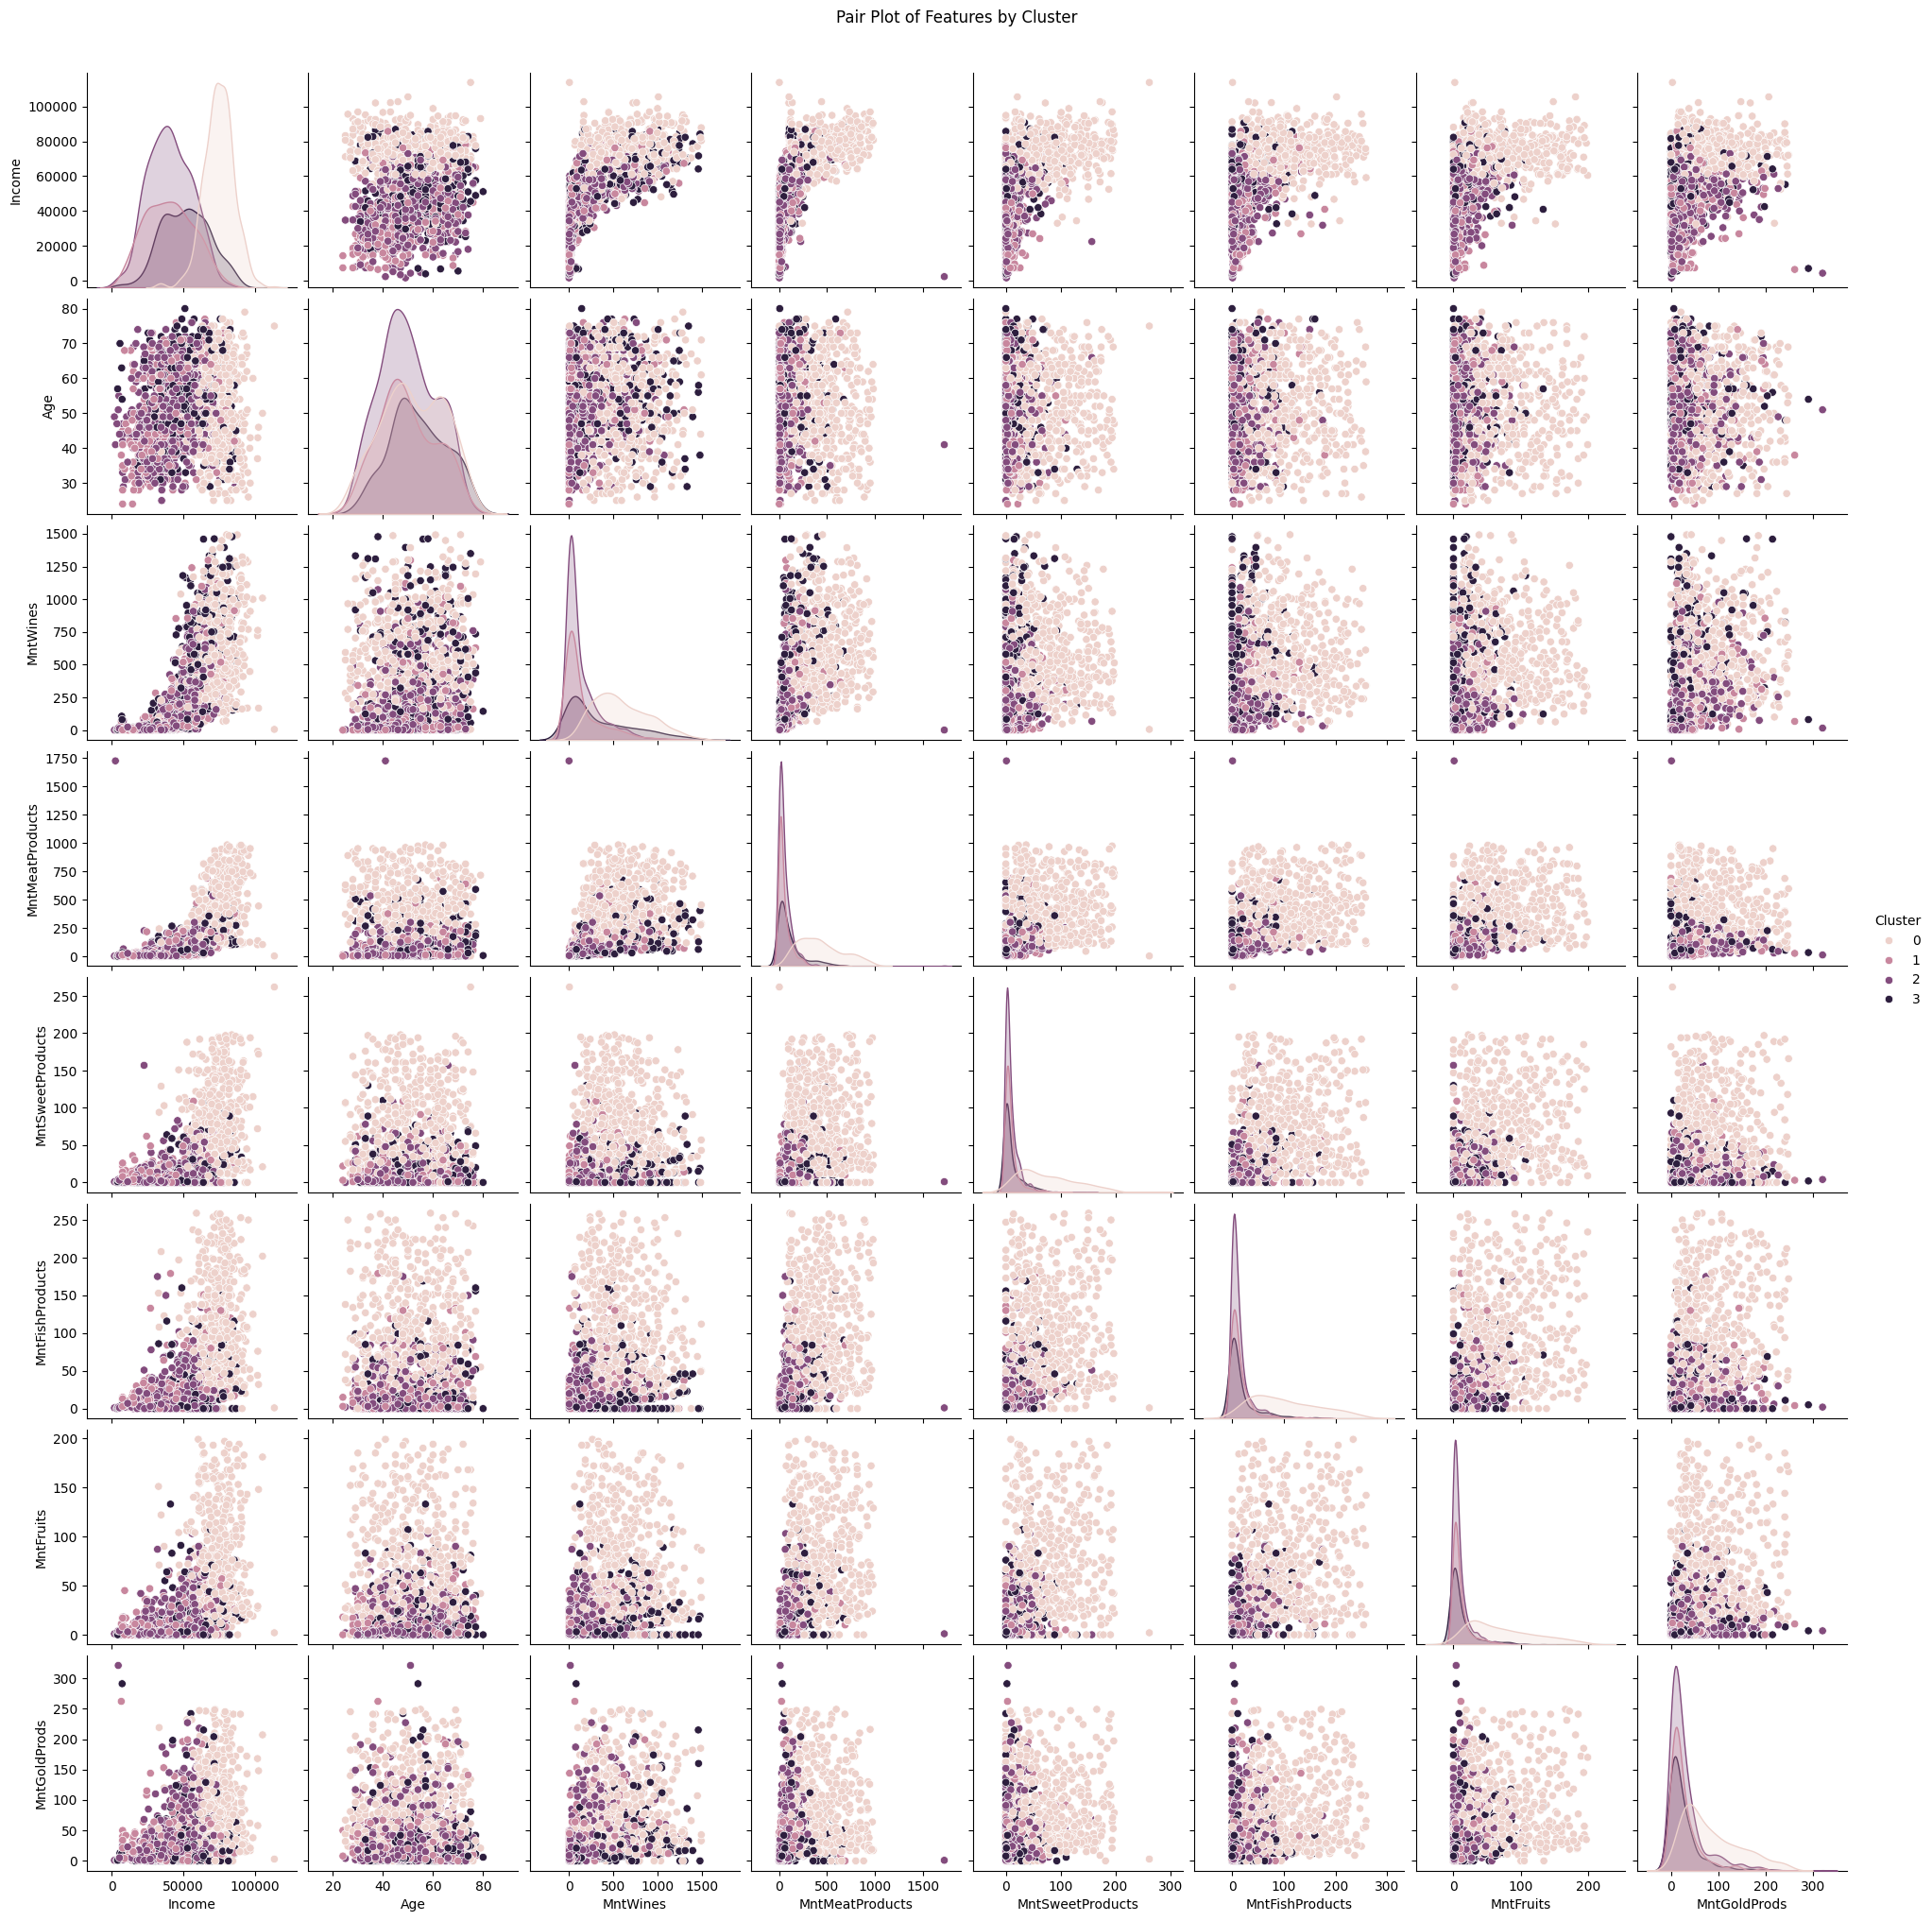

In [ ]:

sns.pairplot(df, hue='Cluster', vars=numeric_cols, diag_kind='kde')
plt.suptitle('Pair Plot of Features by Cluster', y=1.02)
plt.show()

**Validation using Silhouette Score**

In [ ]:

numeric_cols = [
    'Income',
    'Age',
    'MntWines',
    'MntMeatProducts',
    'MntSweetProducts',
    'MntFishProducts',
    'MntFruits',
    'MntGoldProds'
]


features = df[numeric_cols]
silhouette_avg = silhouette_score(features, df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.4f}')

Silhouette Score: 0.0406


**Cluster Insights and Recommendations**

**Cluster 0**

 This cluster most likely represents wealthy customers who purchase high quality and high value products. These customers have the highest average income and are older in age.
 Customers in this cluster spend money on wine, meat, fish, and sweet products as well as fruits and gold.

**Cluster 1**

This cluster represents customers with the lowest average income and are younger in age compared to the customers in the other clusters. These customers spend less on all categories, indicating that they are more price sensitive.

**Cluster 2**

This cluster is somewhat closer to cluster 1 interms of age and income. The spending pattern is also close to cluster 1, exhibiting low spending on all categories.

**Cluster 3**

This cluster has the oldest age group with a higher income. This group has a higher spenditure pattern but is moderate compared to cluster 0.

**Strategies**


**Cluster 0**

Marketing luxury goods towards cluster 0 could beneficial because it aligns with their purchasing patterns. Increasing efforts in campaigns for products such as high quality wine could result in a good outcome.

**Cluster 1 and 2** could be good targets for value oriented goods instead of luxury goods. Centering market campaigns around the value of the goods instead of the price would be a good selling point.

Another strategy would be offering discounts on products such as wine and meat in order to attract this group and encourage more purchases.

**Cluster 3**

These customers could also benefit from targeted campaigns especially for wine and meat.